# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
%matplotlib inline


pd.set_option('display.float_format', '{:.5f}'.format)
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [689]:
#  ML : scikit-learn library methods 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
#  ML : yellowbrick library methods -ploting
from yellowbrick.model_selection import ValidationCurve

In [2]:
!conda env list


# conda environments:
#
base                 * C:\ProgramData\anaconda3
da                     C:\Users\ayner\.conda\envs\da
ds                     C:\Users\ayner\.conda\envs\ds



In [3]:
ri = pd.read_csv("C:/Data Science/ML/assignments/proje 1/autoScout_Ready_to_ML.csv")

In [4]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [5]:
ri.head(3).T

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,16950.0,80900.0,69900.0
body_type,Compact,Compact,Compact
type,Used,Pre-registered,Used
warranty,Yes,Yes,Yes
mileage,120200.0,5000.0,18900.0
gearbox,Manual,Automatic,Automatic
fuel_type,Diesel,Electric,Benzine


In [6]:
#ri.head()

In [7]:
ri.select_dtypes(exclude=['number']).nunique()

make_model                        490
make                               13
location                         7178
body_type                           6
type                                4
warranty                            2
gearbox                             3
fuel_type                           4
seller                              2
drivetrain                          3
extras                           9021
full_service_history                2
upholstery                          2
energy_efficiency_class             2
comfort_&_convenience_Package       3
entertainment_&_media_Package       2
safety_&_security_Package           3
dtype: int64

### Cleaning Column Names

In [8]:
#1.alternative
#def clean_column(col):
#    col = col.strip().lower()                          # Küçük harf ve boşluk temizliği
#    col = col.replace('&', 'and')                      # & yerine "and"
    #col = col.replace(' ', '_')                        # Boşluk yerine alt çizgi
#    col = ''.join(c for c in col if c.isalnum() or c == '_')  # Harf, rakam ve alt çizgi dışındakileri sil
#    return col

# Tüm kolon isimlerine uygula
#ri.columns = [clean_column(col) for col in ri.columns]

In [9]:
#2.alternative
ri.columns=ri.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('co₂-', 'CO2_').str.replace('&', 'and')   #.str.replace("-","_").str.replace(r'[()]', '',regex=True)

In [10]:
ri.columns

Index(['make_model', 'make', 'location', 'price', 'body_type', 'type',
       'warranty', 'mileage', 'gearbox', 'fuel_type', 'seller', 'engine_size',
       'gears', 'co_emissions', 'drivetrain', 'extras', 'empty_weight',
       'full_service_history', 'upholstery', 'previous_owner',
       'energy_efficiency_class', 'age', 'power_kw', 'cons_avg',
       'comfort_and_convenience_package', 'entertainment_and_media_package',
       'safety_and_security_package'],
      dtype='object')

### Drop

In [11]:
ri1=ri.copy()

In [12]:
ri1.shape

(26711, 27)

In [13]:
ri1.duplicated().sum()

1815

In [14]:
ri1 = ri1.drop_duplicates()

In [15]:
ri1.shape

(24896, 27)

In [16]:
ri1.drop(columns=['make','location'],inplace=True)

In [17]:
ri1.shape

(24896, 25)

In [18]:
ri1.select_dtypes(exclude=['number']).nunique()

make_model                          490
body_type                             6
type                                  4
warranty                              2
gearbox                               3
fuel_type                             4
seller                                2
drivetrain                            3
extras                             9021
full_service_history                  2
upholstery                            2
energy_efficiency_class               2
comfort_and_convenience_package       3
entertainment_and_media_package       2
safety_and_security_package           3
dtype: int64

In [19]:
non_numeric_columns = ri1.select_dtypes(exclude=['number']).columns
non_numeric_columns

Index(['make_model', 'body_type', 'type', 'warranty', 'gearbox', 'fuel_type',
       'seller', 'drivetrain', 'extras', 'full_service_history', 'upholstery',
       'energy_efficiency_class', 'comfort_and_convenience_package',
       'entertainment_and_media_package', 'safety_and_security_package'],
      dtype='object')

In [20]:
ri1.select_dtypes(include=['number']).columns

Index(['price', 'mileage', 'engine_size', 'gears', 'co_emissions',
       'empty_weight', 'previous_owner', 'age', 'power_kw', 'cons_avg'],
      dtype='object')

### Outliers Control

In [21]:
fig=plt.figure(figsize=(20,20),dpi=200)

<Figure size 4000x4000 with 0 Axes>

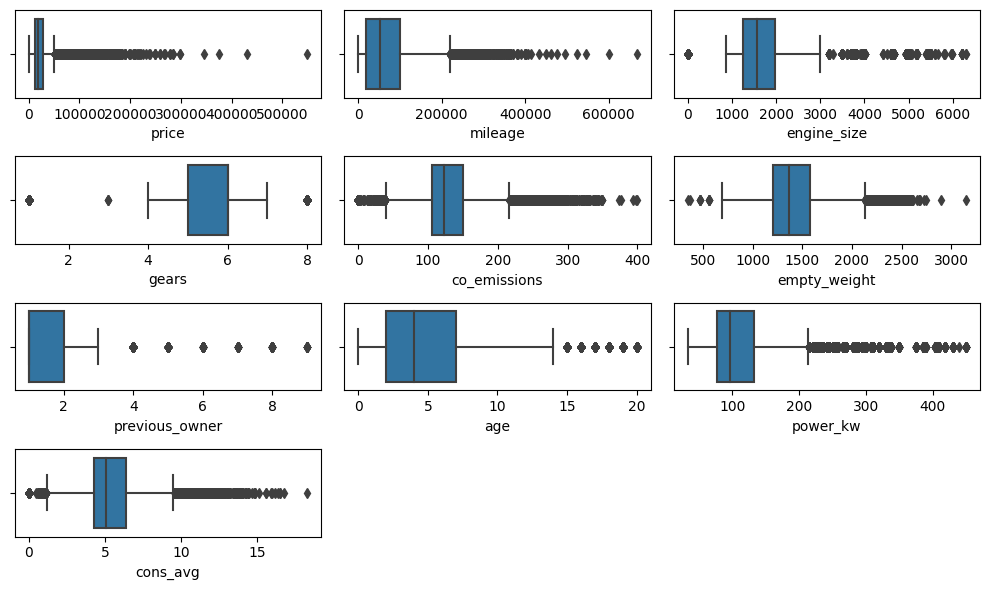

In [22]:
for i,col in enumerate(ri1.select_dtypes(include=['number']).columns):
    plt.subplot(4,3,i+1)
    ax=sns.boxplot(x=ri1[col])
plt.tight_layout();

In [23]:
ri1.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
price,24896.0,23267.093067,20929.617776,490.0,12480.0,17990.0,27900.00,549000.0
mileage,24896.0,67626.156910,61708.674086,0.0,19000.0,52862.5,99532.25,667128.0
engine_size,24896.0,1698.132150,789.478406,0.0,1242.0,1580.0,1969.00,6300.0
gears,24896.0,5.774582,1.407822,1.0,5.0,6.0,6.00,8.0
co_emissions,24896.0,129.384751,54.363831,0.0,106.0,123.0,150.00,399.0
empty_weight,24896.0,1409.004820,299.565866,347.0,1205.0,1365.0,1575.00,3150.0
previous_owner,24896.0,1.458507,0.849019,1.0,1.0,1.0,2.00,9.0
age,24896.0,5.128213,4.607968,0.0,2.0,4.0,7.00,20.0
power_kw,24896.0,117.265284,66.075700,33.0,77.0,97.0,132.00,450.0
cons_avg,24896.0,5.540101,2.226174,0.0,4.3,5.1,6.40,18.3


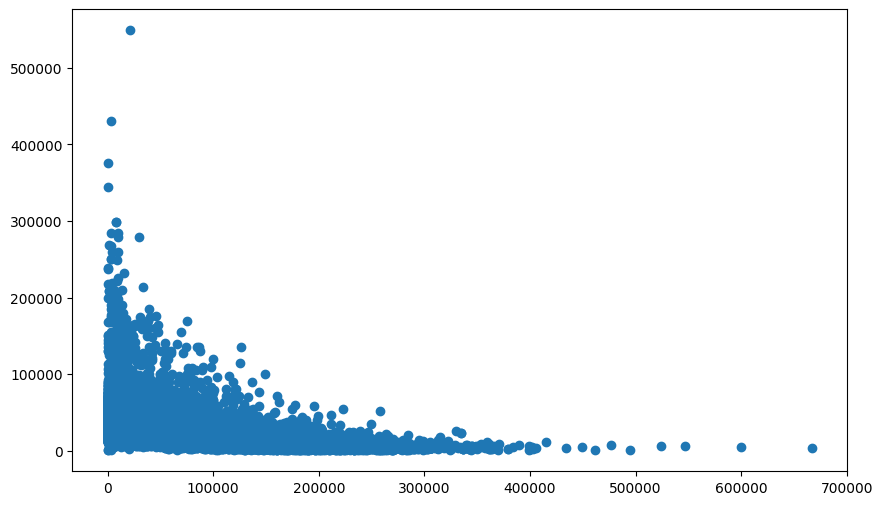

In [24]:
plt.scatter(ri1['mileage'],ri1['price'])

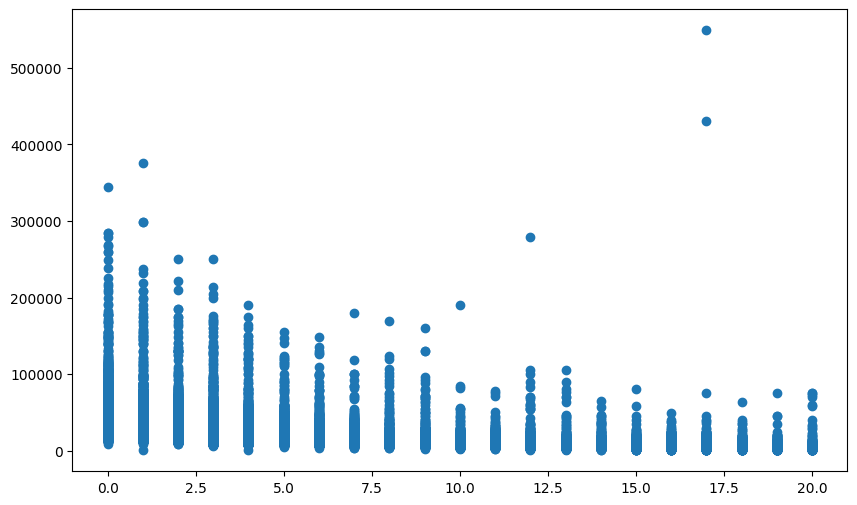

In [25]:
plt.scatter(ri1['age'], ri1['price'])

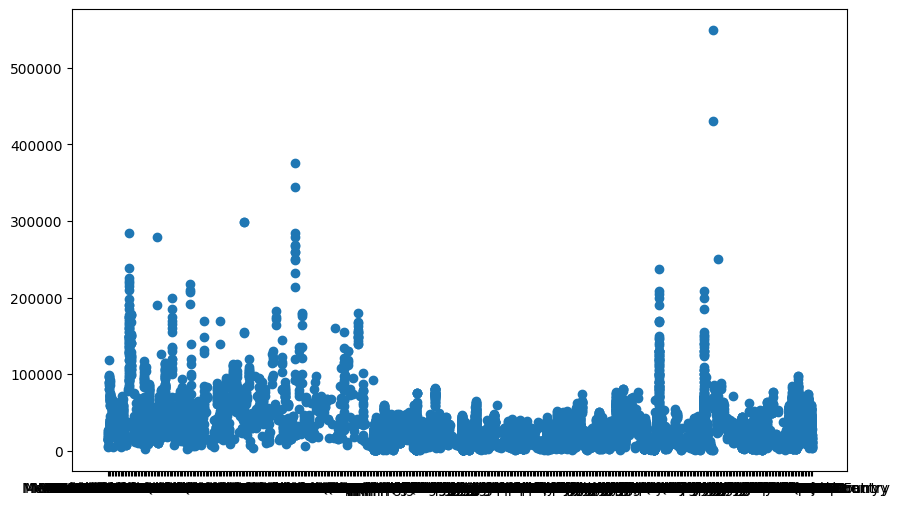

In [26]:
plt.scatter(ri1['make_model'], ri1['price'])

In [27]:
ri1[ri1.price>300000]

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_and_convenience_package,entertainment_and_media_package,safety_and_security_package
1219,Mercedes-Benz G 63 AMG,344900.0,Off-Road/Pick-up,Pre-registered,Yes,100.0,Automatic,Benzine,Dealer,3982.0,7.0,330.0,4WD,"Alloy wheels, Trailer hitch",2560.0,No,Part/Full Leather,1.0,unefficient,0.0,430.0,0.0,Standard,Plus,Safety Premium Package
1231,Mercedes-Benz G 63 AMG,375900.0,Off-Road/Pick-up,Pre-registered,Yes,100.0,Automatic,Benzine,Dealer,3982.0,7.0,330.0,4WD,"Alloy wheels, Trailer hitch",2560.0,No,Part/Full Leather,1.0,unefficient,1.0,430.0,0.0,Standard,Plus,Safety Premium Package
20059,Ford GT,549000.0,Coupe,Used,No,20800.0,Manual,Benzine,Dealer,5409.0,6.0,350.0,Rear,"Alloy wheels, Headlight washer system, Sport s...",1650.0,No,Part/Full Leather,2.0,unefficient,17.0,405.0,14.0,Standard,Standard,Safety Standard Package
20111,Ford GT,430000.0,Coupe,Used,Yes,3166.0,Manual,Benzine,Dealer,4949.0,5.0,350.0,Rear,"Alloy wheels, Headlight washer system, Sport s...",1650.0,No,Part/Full Leather,2.0,unefficient,17.0,405.0,14.0,Standard,Standard,Safety Standard Package


In [28]:
IQR=stats.iqr(ri1.price)
Q1=ri1.price.describe().loc['25%']
Q3=ri1.price.describe().loc['75%']
print('IQR : ',IQR,' Q1 : ',Q1,' Q3 : ',Q3)

IQR :  15420.0  Q1 :  12480.0  Q3 :  27900.0


In [29]:
lower_limit_price= Q1-1.5*IQR
upper_limit_price= Q3+1.5*IQR
print( 'lower-upper limit: ',lower_limit_price,' - ' ,upper_limit_price )

lower-upper limit:  -10650.0  -  51030.0


In [30]:
lower_limit_price= Q1-1*IQR
upper_limit_price= Q3+3*IQR
print( 'lower-upper limit: ',lower_limit_price,' - ' ,upper_limit_price )

lower-upper limit:  -2940.0  -  74160.0


<Axes: xlabel='price', ylabel='Count'>

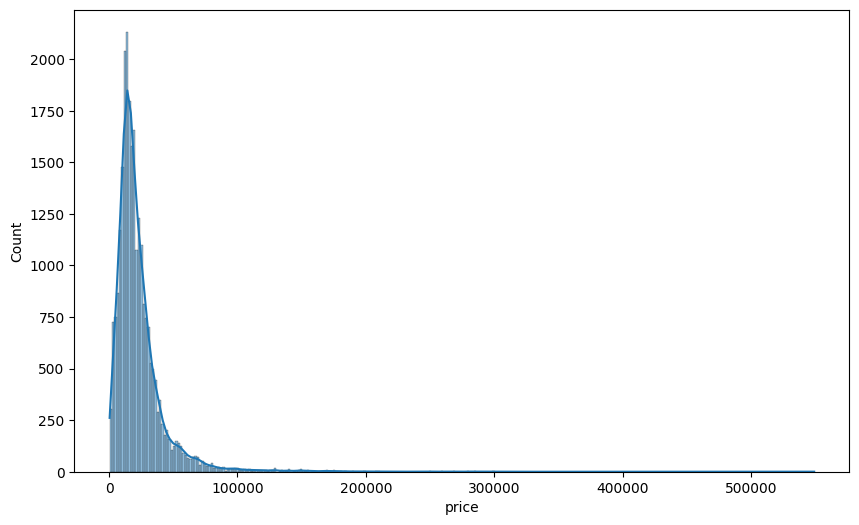

In [31]:
sns.histplot(x='price',data=ri1,bins=300,kde=True)

<Axes: xlabel='price', ylabel='Count'>

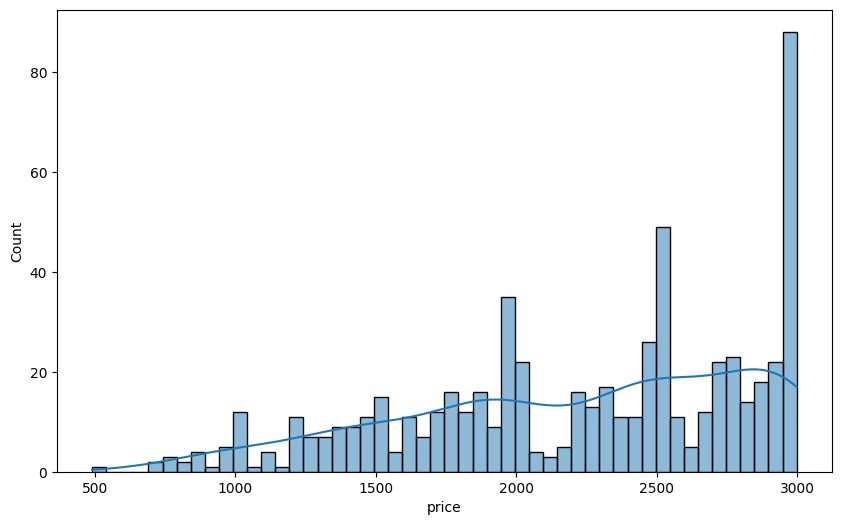

In [32]:
sns.histplot(ri1[ri1.price<3000].price,bins=50,kde=True)

<Axes: xlabel='price', ylabel='Count'>

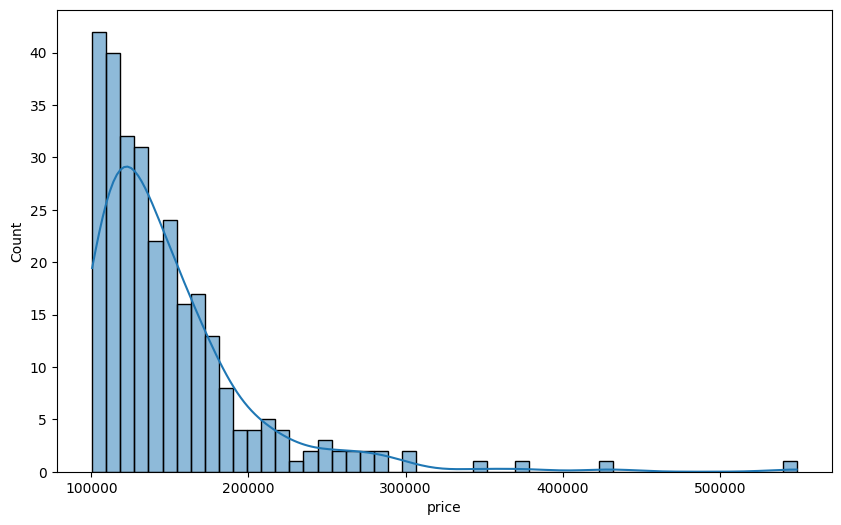

In [33]:
sns.histplot(ri1[ri1.price>100000].price,bins=50,kde=True)

<Axes: xlabel='price', ylabel='Count'>

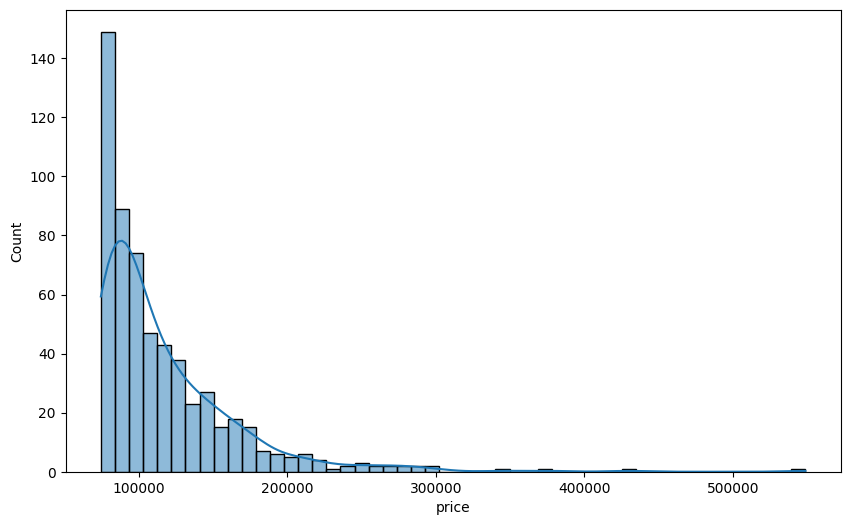

In [34]:
sns.histplot(ri1[ri1.price>74161].price,bins=50,kde=True)

In [64]:
condition=(ri1.price>1000) & (ri1.price<75161)

In [487]:
#ri2=ri1[condition]    ####Definitive Fix: Make an explicit .copy() when creating ri2 , copy yapmayinca asagida ri2 ile apply islemi yaparken SettingWithCopyWarning hata veriyor
ri2=ri1[condition].copy()

In [488]:
ri2.shape

(24306, 25)

In [489]:
ri1.shape

(24896, 25)

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

### Converting the Extras feature from object to numeric

In [490]:
#df_filled=pd.DataFrame(ri2.extras)

In [491]:
#df_filled

In [492]:
def count_features(text):
    if pd.isna(text):
        return 0
    return len(text.split(','))

In [493]:
#df_filled['ex_count'] = df_filled['extras'].apply(count_features)
#ri2['ex_count'] = ri2['extras'].apply(count_features)  #  warning veriyor
ri2.loc[:, 'ex_count'] = ri2['extras'].apply(count_features)

In [494]:
ri2.drop(columns='extras', inplace=True)

In [495]:
ri2.shape

(24306, 25)

In [496]:
ri2.columns

Index(['make_model', 'price', 'body_type', 'type', 'warranty', 'mileage',
       'gearbox', 'fuel_type', 'seller', 'engine_size', 'gears',
       'co_emissions', 'drivetrain', 'empty_weight', 'full_service_history',
       'upholstery', 'previous_owner', 'energy_efficiency_class', 'age',
       'power_kw', 'cons_avg', 'comfort_and_convenience_package',
       'entertainment_and_media_package', 'safety_and_security_package',
       'ex_count'],
      dtype='object')

In [497]:
#df_transformed = df_filled.copy()

# 1. Log dönüşümü (log(1 + x)
#df_transformed['ex_count_log'] = np.log1p(df_transformed['ex_count'])


In [498]:
#log_Q1 = df_transformed['ex_count_log'].quantile(0.25)
#log_Q3 = df_transformed['ex_count_log'].quantile(0.75)
#log_IQR = log_Q3 - log_Q1
#log_upper = log_Q3 + 1.5 * log_IQR

#log_outliers = df_transformed[df_transformed['ex_count_log'] > log_upper]
#print("Log dönüşüm sonrası outlier sayısı:", len(log_outliers))

In [499]:
#df_filled['price_segment'] = pd.qcut(ri['price'], q=3, labels=["Low", "Medium", "High"])

In [500]:
# avg model price can be used, but when the target is price, price can't be used. 
#df_filled['ex_density'] = df_filled['ex_count'] / ri['price']

In [501]:
#df_filled['ex_cat'] = pd.cut(
#    df_filled['ex_density'],
#    bins=[-float('inf'), 0.00015, 0.00035, float('inf')],
#    labels=["Basic", "Comfort", "Luxe"]
#)

In [502]:
#df_filled

In [503]:
#ri['extras_cat']=df_filled.ex_cat

In [504]:
#ri['extras_cat'].unique()

In [505]:
# from sklearn.preprocessing import LabelEncoder

# # LabelEncoder nesnesi oluştur
# le = LabelEncoder()

# # Her kategorik sütunu encode edip yeni bir sütuna ata
# df_filled['ex_cat_enc'] = le.fit_transform(df_filled['ex_cat'])

In [506]:
#df_filled['ex_cat_enc'].unique()

In [507]:
#ri2['extras']=df_filled.ex_count

## To Improve Scores, that are calculated below in Lineer Regression : Drop some values that have not sufficent observation: accepted value: > 70

### !!!! o halde islemleri bastan yapmaliyim, bu kisimda yazilanlari  yukarida ilgili yere tasiyarak tum islemleri tekrar baslatiyorum.

In [508]:
make_model_value_counts=ri2.make_model.value_counts()

In [509]:
make_models_more70 = make_model_value_counts [make_model_value_counts>70].index

In [510]:
make_models_more70

Index(['Renault Megane', 'SEAT Leon', 'Dacia Sandero', 'Hyundai i30',
       'Opel Astra', 'Ford Mustang', 'Peugeot 308', 'Nissan Qashqai',
       'Ford Focus', 'SEAT Ibiza', 'Volvo V40', 'Fiat Tipo', 'Fiat 500',
       'Renault Clio', 'Ford Fiesta', 'Nissan Micra', 'Fiat 500X',
       'Skoda Octavia', 'Opel Corsa', 'Dacia Duster', 'Toyota Yaris',
       'Opel Insignia', 'Volvo C70', 'Peugeot 208', 'Skoda Fabia', 'Fiat 500C',
       'Toyota Auris', 'Peugeot RCZ', 'Hyundai TUCSON', 'Peugeot 3008',
       'Ford Kuga', 'Dacia Logan', 'Peugeot 508', 'Toyota Corolla',
       'Skoda Superb', 'Volvo XC60', 'Skoda Scala', 'SEAT Ateca', 'SEAT Arona',
       'Hyundai i20', 'Volvo V60', 'Renault Captur', 'Ford Mondeo',
       'Nissan 370Z', 'Skoda Kodiaq', 'Toyota C-HR', 'Peugeot 207',
       'Peugeot 2008', 'Skoda Karoq', 'Renault Talisman', 'Opel Grandland X',
       'Renault Kadjar', 'Opel Cascada', 'Toyota Aygo', 'Volvo S60',
       'Mercedes-Benz A 180', 'Volvo C30', 'Nissan X-Trail', 'Nissa

In [511]:
ri3=ri2[ri2.make_model.isin(make_models_more70)].copy()

## multicollinearity control

In [512]:
ri3_numeric_columns = ri3.select_dtypes(include=['number'])

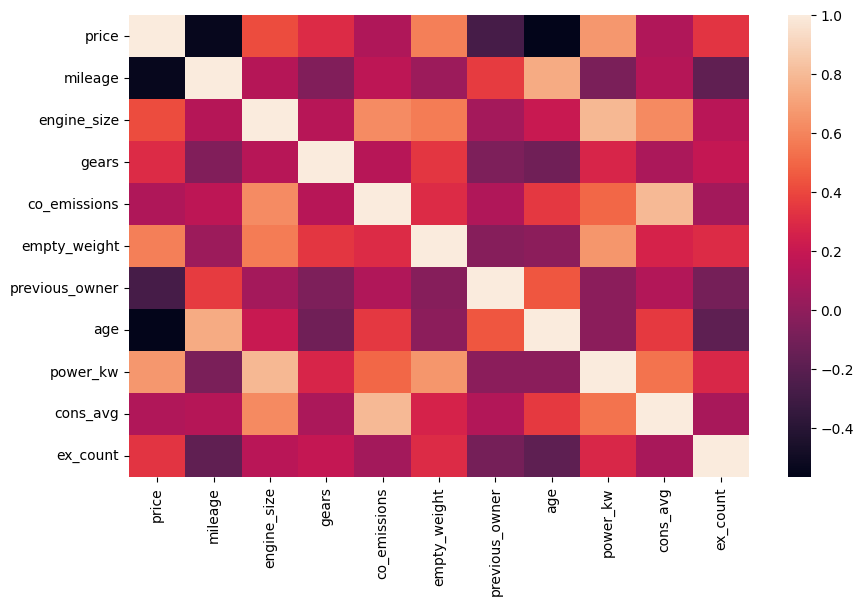

In [513]:
sns.heatmap(ri3_numeric_columns.corr(),annot=False)
plt.show()

* multicolunarity var gibi, 0.8 civari olan coorelasyonlar goruluyor

In [514]:
# VIF ile kontrol edelim
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [515]:
X_vif=ri3_numeric_columns.drop(columns='price')

In [516]:
df_vif=pd.DataFrame()
df_vif['columns']=X_vif.columns
df_vif['VIF']=[variance_inflation_factor(X_vif.values,i) for i in range (len (X_vif.columns))]
df_vif

,columns,VIF
0,mileage,5.45016
1,engine_size,24.65515
2,gears,19.88946
3,co_emissions,23.37234
4,empty_weight,34.77575
5,previous_owner,4.82296
6,age,6.94537
7,power_kw,17.91856
8,cons_avg,24.54464
9,ex_count,2.78715


##### Each VIF value shows how much a variable is correlated with other predictors:

* VIF = 1: no multicollinearity

* VIF > 5: moderate correlation

* VIF > 10: high multicollinearity (often a red flag)



* MULTICOLLINEARITY VAR   # VIF ile bakinca

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [517]:
from sklearn.model_selection import train_test_split


In [518]:
X = ri3.drop(columns="price", axis=1)
y = ri3["price"]

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [520]:
X_train

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_and_convenience_package,entertainment_and_media_package,safety_and_security_package,ex_count
17613,Nissan Qashqai,Compact,Used,Yes,103541.00000,Automatic,Diesel,Dealer,1600.00000,6.00000,131.50000,Front,1275.00000,No,Part/Full Leather,2.00000,efficient,6.00000,96.00000,4.90000,Premium,Standard,Safety Premium Package,1
8785,Peugeot 208,Sedan,Used,No,100.00000,Automatic,Benzine,Dealer,1199.00000,8.00000,99.00000,Front,1233.00000,No,Cloth,1.00000,efficient,1.00000,96.00000,4.50000,Standard,Standard,Safety Premium Package,4
15074,Dacia Logan,Station wagon,Used,Yes,74850.00000,Manual,Benzine,Dealer,1390.00000,5.00000,120.00000,Front,1240.00000,No,Cloth,1.00000,unefficient,13.00000,55.00000,5.20000,Standard,Standard,Safety Standard Package,5
8742,Peugeot 308,Sedan,Used,Yes,7600.00000,Automatic,Diesel,Dealer,1499.00000,8.00000,114.00000,Front,1280.00000,No,Cloth,1.00000,efficient,1.00000,98.00000,3.70000,Standard,Standard,Safety Premium Package,1
11434,SEAT Leon,Coupe,Used,No,131620.00000,Manual,Benzine,Private seller,1197.00000,6.00000,114.00000,Front,1114.00000,No,Cloth,2.00000,efficient,7.00000,81.00000,4.90000,Standard,Standard,Safety Premium Package,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14620,Dacia Duster,Off-Road/Pick-up,Used,Yes,12751.00000,Manual,Benzine,Dealer,1332.00000,6.00000,139.00000,4WD,1320.00000,No,Cloth,1.00000,unefficient,0.00000,110.00000,6.15000,Premium,Plus,Safety Premium Package,7
15460,Dacia Sandero,Sedan,Used,No,11000.00000,Manual,Benzine,Dealer,999.00000,6.00000,101.00000,Front,1171.00000,No,Cloth,1.00000,efficient,1.00000,66.00000,6.30000,Standard,Plus,Safety Premium Package,1
8031,Peugeot 3008,Off-Road/Pick-up,Used,Yes,62930.00000,Manual,Benzine,Dealer,1199.00000,6.00000,118.00000,Front,1492.00000,Yes,Cloth,1.00000,efficient,3.00000,96.00000,5.30000,Standard,Plus,Safety Premium Plus Package,7
2820,Opel Astra,Convertible,Used,No,189950.00000,Manual,Benzine,Dealer,1796.00000,5.00000,185.00000,Front,1500.00000,No,Part/Full Leather,4.00000,unefficient,15.00000,103.00000,7.70000,Standard,Standard,Safety Premium Package,8


In [521]:
X_test

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_and_convenience_package,entertainment_and_media_package,safety_and_security_package,ex_count
19693,Ford Fiesta,Compact,Used,No,9350.00000,Manual,Benzine,Dealer,998.00000,6.00000,110.00000,Front,1063.00000,Yes,Cloth,2.00000,efficient,3.00000,74.00000,5.10000,Premium,Standard,Safety Premium Package,8
21432,Ford Focus,Sedan,Used,No,14285.00000,Manual,Benzine,Dealer,999.00000,6.00000,122.00000,Front,1371.00000,Yes,Part/Full Leather,1.00000,efficient,2.00000,114.00000,5.40000,Standard,Plus,Safety Premium Package,9
12670,Skoda Fabia,Compact,Used,Yes,15990.00000,Automatic,Benzine,Dealer,999.00000,7.00000,134.00000,Front,1164.00000,Yes,Cloth,1.00000,efficient,3.00000,81.00000,4.70000,Premium,Plus,Safety Premium Package,9
17185,Toyota Auris,Sedan,Used,Yes,109117.00000,Manual,Benzine,Dealer,1598.00000,6.00000,125.50000,Front,1265.00000,No,Cloth,1.00000,efficient,8.00000,97.00000,5.00000,Premium,Standard,Safety Premium Package,1
9521,Fiat 500C,Convertible,Pre-registered,No,1.00000,Manual,Benzine,Dealer,1000.00000,6.00000,99.00000,Front,905.00000,No,Part/Full Leather,1.00000,efficient,1.00000,51.00000,4.90000,Standard,Plus,Safety Premium Package,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22480,Hyundai KONA,Off-Road/Pick-up,Used,No,19390.00000,Manual,Benzine,Dealer,998.00000,6.00000,129.00000,Front,1233.00000,Yes,Cloth,2.00000,unefficient,2.00000,88.00000,5.70000,Premium,Plus,Safety Premium Package,9
22516,Hyundai TUCSON,Off-Road/Pick-up,Used,No,68777.00000,Manual,Benzine,Dealer,1591.00000,6.00000,147.00000,Front,1539.00000,No,Cloth,2.00000,unefficient,5.00000,97.00000,6.30000,Premium,Standard,Safety Premium Package,3
25660,Volvo V60,Station wagon,Used,Yes,31588.00000,Automatic,Benzine,Dealer,1969.00000,8.00000,171.00000,4WD,1903.00000,Yes,Part/Full Leather,1.00000,unefficient,3.00000,228.00000,7.40000,Premium,Plus,Safety Premium Package,4
187,Mercedes-Benz A 200,Compact,Used,No,64810.00000,Automatic,Benzine,Dealer,1332.00000,7.00000,123.00000,Front,1275.00000,Yes,Part/Full Leather,3.00000,efficient,3.00000,121.00000,5.30000,Standard,Plus,Safety Premium Package,4


In [522]:
y_train

17613   19750.00000
8785    26990.00000
15074    5995.00000
8742    31899.00000
11434    9950.00000
            ...    
14620   23480.00000
15460   16990.00000
8031    23490.00000
2820     3990.00000
20219   37900.00000
Name: price, Length: 15964, dtype: float64

In [523]:
y_test

19693   15890.00000
21432   26388.00000
12670   16990.00000
17185   11990.00000
9521    16990.00000
            ...    
22480   19690.00000
22516   17480.00000
25660   35960.00000
187     33500.00000
11304   18643.00000
Name: price, Length: 3992, dtype: float64

# Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

### * Column Transformer with OrdinalEncoder

In [524]:
from sklearn.preprocessing import OrdinalEncoder
# categories = ['worst','bad','good']
# enc_2 = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
# enc_2.fit_transform(X_train)
# enc_2.transform(X_test)

In [525]:
#def ordinal (categories):
#    enc = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
#    return enc  #.fit_transform(pd.DataFrame(col))
## In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
## We set the unknown_value as -1, since we want to be sure as it a different category.

In [526]:
def X_ordinalEncoding (X_train,X_test,cols,categories):
    for col in cols:
        enc = OrdinalEncoder(categories=[categories[col]], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
        #X_train[col]=enc.fit_transform(pd.DataFrame(X_train[col]))
        #X_test[col]=enc.transform(pd.DataFrame(X_test[col])) 
        X_train[col]=enc.fit_transform(X_train[[col]])
        X_test[col]=enc.transform(X_test[[col]]) 
    return  X_train, X_test

In [527]:
# We need to define the order of the categories explicitly.

In [528]:
ri3.select_dtypes(exclude=['number']).columns

Index(['make_model', 'body_type', 'type', 'warranty', 'gearbox', 'fuel_type',
       'seller', 'drivetrain', 'full_service_history', 'upholstery',
       'energy_efficiency_class', 'comfort_and_convenience_package',
       'entertainment_and_media_package', 'safety_and_security_package'],
      dtype='object')

In [529]:
categories={}

In [530]:
categories['comfort_and_convenience_package']=X_train['comfort_and_convenience_package'].unique().tolist()
categories

{'comfort_and_convenience_package': ['Premium', 'Standard', 'Premium Plus']}

In [531]:
X_train['entertainment_and_media_package'].unique()

array(['Standard', 'Plus'], dtype=object)

In [532]:
categories['entertainment_and_media_package']=X_train['entertainment_and_media_package'].unique().tolist()

In [533]:
X_train['safety_and_security_package'].unique()

array(['Safety Premium Package', 'Safety Standard Package',
       'Safety Premium Plus Package'], dtype=object)

In [534]:
#Custom reordering using indices in arrays
#order = [2, 0, 3, 1]
#reordered = arr[order]
categories['safety_and_security_package']=X_train['safety_and_security_package'].unique()[::-1].tolist()

In [535]:
categories

{'comfort_and_convenience_package': ['Premium', 'Standard', 'Premium Plus'],
 'entertainment_and_media_package': ['Standard', 'Plus'],
 'safety_and_security_package': ['Safety Premium Plus Package',
  'Safety Standard Package',
  'Safety Premium Package']}

In [536]:
list(categories.keys())

['comfort_and_convenience_package',
 'entertainment_and_media_package',
 'safety_and_security_package']

In [537]:
 X_train_encoded, X_test_encoded = X_ordinalEncoding (X_train.copy(),X_test.copy(),list(categories.keys()),categories)

In [538]:
X_train_encoded.sample(5).T

,16572,23622,4965,4586,7460
make_model,Toyota Land Cruiser,Volvo V40,Renault Megane,Renault Twingo,Peugeot RCZ
body_type,Off-Road/Pick-up,Compact,Convertible,Compact,Coupe
type,Pre-registered,Used,Used,Used,Used
warranty,No,Yes,No,Yes,No
mileage,10.00000,102768.00000,148000.00000,59754.00000,8000.00000
gearbox,Automatic,Manual,Automatic,Manual,Manual
fuel_type,Diesel,Diesel,Diesel,Benzine,Benzine
seller,Dealer,Dealer,Private seller,Dealer,Private seller
engine_size,2755.00000,1969.00000,1870.00000,999.00000,1598.00000
gears,6.00000,6.00000,4.00000,5.00000,6.00000


In [539]:
X_test_encoded.sample(5).T

,7294,4475,21238,16717,10566
make_model,Peugeot 307,Renault Clio,Ford Mondeo,Toyota Corolla,Fiat 500
body_type,Convertible,Compact,Sedan,Station wagon,Sedan
type,Used,Used,Used,Used,Used
warranty,No,Yes,Yes,No,Yes
mileage,205107.00000,51646.00000,30316.00000,11104.00000,37500.00000
gearbox,Manual,Manual,Automatic,Automatic,Manual
fuel_type,Benzine,Benzine,Diesel,Benzine,Benzine
seller,Dealer,Dealer,Dealer,Dealer,Dealer
engine_size,1997.00000,898.00000,1997.00000,1987.00000,875.00000
gears,5.00000,5.00000,6.00000,1.00000,5.00000


In [540]:
X_test.sample(5).T

,11262,23628,9755,19017,5369
make_model,SEAT Leon,Volvo V40,Fiat 500X,Nissan Qashqai,Renault Megane
body_type,Coupe,Compact,Off-Road/Pick-up,Sedan,Coupe
type,Used,Used,Used,Used,Used
warranty,No,Yes,No,Yes,No
mileage,106500.00000,145040.00000,47000.00000,42738.00000,80292.00000
gearbox,Manual,Manual,Manual,Manual,Manual
fuel_type,Benzine,Diesel,Benzine,Benzine,Diesel
seller,Dealer,Dealer,Dealer,Dealer,Private seller
engine_size,1395.00000,1969.00000,1368.00000,1300.00000,1461.00000
gears,6.00000,6.00000,6.00000,6.00000,6.00000


### * Column Transformer with OneHotEncoder¶

In [541]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

### categorical_cols = ['fuel_type', 'transmission']

#   1.alternative: Create the column transformer
### column_transformer = ColumnTransformer(transformers=[ ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],remainder='passthrough') 
# remainder='passthrough': Keep any other columns as-is (e.g., numerical)

#   2.alternative : use only OneHotEncoder
## enc = OneHotEncoder(categories=[categories['fuel_type']], handle_unknown='ignore', sparse_output=False  ).set_output(transform="pandas") 
### enc = OneHotEncoder(categories=[categories['fuel_type']],  # ✅ wrap in list
###    handle_unknown='ignore',
###    sparse_output=False                # optional: returns dense array
### ).set_output(transform="pandas")      # for DataFrame output


# enc.fit_transform(X_train)
# enc.transform(X_test)

In [542]:
# To prevent numbers from being shown in scientific notation (like 4.154872e+03) in your pandas DataFrame, you can control the display format.
## for numpy arrays
np.set_printoptions(suppress=True)

In [543]:
categorical_cols= (X_train_encoded.select_dtypes(exclude=['number']).columns).tolist()
categorical_cols

['make_model',
 'body_type',
 'type',
 'warranty',
 'gearbox',
 'fuel_type',
 'seller',
 'drivetrain',
 'full_service_history',
 'upholstery',
 'energy_efficiency_class']

In [544]:
enc = ColumnTransformer(transformers=[ ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_cols)],remainder='passthrough').set_output(transform="pandas")


In [545]:
X_train_encoded_all=enc.fit_transform(X_train_encoded)
X_train_encoded_all

,cat__make_model_Dacia Duster,cat__make_model_Dacia Lodgy,cat__make_model_Dacia Logan,cat__make_model_Dacia Sandero,cat__make_model_Fiat 124 Spider,cat__make_model_Fiat 500,cat__make_model_Fiat 500C,cat__make_model_Fiat 500L,cat__make_model_Fiat 500X,cat__make_model_Fiat Panda,cat__make_model_Fiat Tipo,cat__make_model_Ford Fiesta,cat__make_model_Ford Focus,cat__make_model_Ford Kuga,cat__make_model_Ford Mondeo,cat__make_model_Ford Mustang,cat__make_model_Hyundai IONIQ,cat__make_model_Hyundai KONA,cat__make_model_Hyundai TUCSON,cat__make_model_Hyundai i10,cat__make_model_Hyundai i20,cat__make_model_Hyundai i30,cat__make_model_Hyundai i40,cat__make_model_Mercedes-Benz A 180,cat__make_model_Mercedes-Benz A 200,cat__make_model_Mercedes-Benz C 200,cat__make_model_Mercedes-Benz C 220,cat__make_model_Nissan 350Z,cat__make_model_Nissan 370Z,cat__make_model_Nissan Juke,cat__make_model_Nissan Micra,cat__make_model_Nissan Pulsar,cat__make_model_Nissan Qashqai,cat__make_model_Nissan X-Trail,cat__make_model_Opel Adam,cat__make_model_Opel Astra,cat__make_model_Opel Cascada,cat__make_model_Opel Corsa,cat__make_model_Opel Crossland X,cat__make_model_Opel Grandland X,cat__make_model_Opel Insignia,cat__make_model_Opel Mokka,cat__make_model_Peugeot 2008,cat__make_model_Peugeot 206,cat__make_model_Peugeot 207,cat__make_model_Peugeot 208,cat__make_model_Peugeot 3008,cat__make_model_Peugeot 307,cat__make_model_Peugeot 308,cat__make_model_Peugeot 407,...,cat__make_model_Volvo S90,cat__make_model_Volvo V40,cat__make_model_Volvo V60,cat__make_model_Volvo V90,cat__make_model_Volvo XC40,cat__make_model_Volvo XC60,cat__make_model_Volvo XC90,cat__body_type_Compact,cat__body_type_Convertible,cat__body_type_Coupe,cat__body_type_Off-Road/Pick-up,cat__body_type_Sedan,cat__body_type_Station wagon,cat__type_Demonstration,cat__type_Employee's car,cat__type_Pre-registered,cat__type_Used,cat__warranty_No,cat__warranty_Yes,cat__gearbox_Automatic,cat__gearbox_Manual,cat__gearbox_Semi-automatic,cat__fuel_type_Benzine,cat__fuel_type_Diesel,cat__fuel_type_Electric,cat__fuel_type_Liquid/Natural Gas,cat__seller_Dealer,cat__seller_Private seller,cat__drivetrain_4WD,cat__drivetrain_Front,cat__drivetrain_Rear,cat__full_service_history_No,cat__full_service_history_Yes,cat__upholstery_Cloth,cat__upholstery_Part/Full Leather,cat__energy_efficiency_class_efficient,cat__energy_efficiency_class_unefficient,remainder__mileage,remainder__engine_size,remainder__gears,remainder__co_emissions,remainder__empty_weight,remainder__previous_owner,remainder__age,remainder__power_kw,remainder__cons_avg,remainder__comfort_and_convenience_package,remainder__entertainment_and_media_package,remainder__safety_and_security_package,remainder__ex_count
17613,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,103541.00000,1600.00000,6.00000,131.50000,1275.00000,2.00000,6.00000,96.00000,4.90000,0.00000,0.00000,2.00000,1
8785,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000

In [546]:
X_test_encoded_all=enc.transform(X_test_encoded)
X_test_encoded_all

,cat__make_model_Dacia Duster,cat__make_model_Dacia Lodgy,cat__make_model_Dacia Logan,cat__make_model_Dacia Sandero,cat__make_model_Fiat 124 Spider,cat__make_model_Fiat 500,cat__make_model_Fiat 500C,cat__make_model_Fiat 500L,cat__make_model_Fiat 500X,cat__make_model_Fiat Panda,cat__make_model_Fiat Tipo,cat__make_model_Ford Fiesta,cat__make_model_Ford Focus,cat__make_model_Ford Kuga,cat__make_model_Ford Mondeo,cat__make_model_Ford Mustang,cat__make_model_Hyundai IONIQ,cat__make_model_Hyundai KONA,cat__make_model_Hyundai TUCSON,cat__make_model_Hyundai i10,cat__make_model_Hyundai i20,cat__make_model_Hyundai i30,cat__make_model_Hyundai i40,cat__make_model_Mercedes-Benz A 180,cat__make_model_Mercedes-Benz A 200,cat__make_model_Mercedes-Benz C 200,cat__make_model_Mercedes-Benz C 220,cat__make_model_Nissan 350Z,cat__make_model_Nissan 370Z,cat__make_model_Nissan Juke,cat__make_model_Nissan Micra,cat__make_model_Nissan Pulsar,cat__make_model_Nissan Qashqai,cat__make_model_Nissan X-Trail,cat__make_model_Opel Adam,cat__make_model_Opel Astra,cat__make_model_Opel Cascada,cat__make_model_Opel Corsa,cat__make_model_Opel Crossland X,cat__make_model_Opel Grandland X,cat__make_model_Opel Insignia,cat__make_model_Opel Mokka,cat__make_model_Peugeot 2008,cat__make_model_Peugeot 206,cat__make_model_Peugeot 207,cat__make_model_Peugeot 208,cat__make_model_Peugeot 3008,cat__make_model_Peugeot 307,cat__make_model_Peugeot 308,cat__make_model_Peugeot 407,...,cat__make_model_Volvo S90,cat__make_model_Volvo V40,cat__make_model_Volvo V60,cat__make_model_Volvo V90,cat__make_model_Volvo XC40,cat__make_model_Volvo XC60,cat__make_model_Volvo XC90,cat__body_type_Compact,cat__body_type_Convertible,cat__body_type_Coupe,cat__body_type_Off-Road/Pick-up,cat__body_type_Sedan,cat__body_type_Station wagon,cat__type_Demonstration,cat__type_Employee's car,cat__type_Pre-registered,cat__type_Used,cat__warranty_No,cat__warranty_Yes,cat__gearbox_Automatic,cat__gearbox_Manual,cat__gearbox_Semi-automatic,cat__fuel_type_Benzine,cat__fuel_type_Diesel,cat__fuel_type_Electric,cat__fuel_type_Liquid/Natural Gas,cat__seller_Dealer,cat__seller_Private seller,cat__drivetrain_4WD,cat__drivetrain_Front,cat__drivetrain_Rear,cat__full_service_history_No,cat__full_service_history_Yes,cat__upholstery_Cloth,cat__upholstery_Part/Full Leather,cat__energy_efficiency_class_efficient,cat__energy_efficiency_class_unefficient,remainder__mileage,remainder__engine_size,remainder__gears,remainder__co_emissions,remainder__empty_weight,remainder__previous_owner,remainder__age,remainder__power_kw,remainder__cons_avg,remainder__comfort_and_convenience_package,remainder__entertainment_and_media_package,remainder__safety_and_security_package,remainder__ex_count
19693,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,9350.00000,998.00000,6.00000,110.00000,1063.00000,2.00000,3.00000,74.00000,5.10000,0.00000,0.00000,2.00000,8
21432,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000

In [547]:
X_train_encoded

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_and_convenience_package,entertainment_and_media_package,safety_and_security_package,ex_count
17613,Nissan Qashqai,Compact,Used,Yes,103541.00000,Automatic,Diesel,Dealer,1600.00000,6.00000,131.50000,Front,1275.00000,No,Part/Full Leather,2.00000,efficient,6.00000,96.00000,4.90000,0.00000,0.00000,2.00000,1
8785,Peugeot 208,Sedan,Used,No,100.00000,Automatic,Benzine,Dealer,1199.00000,8.00000,99.00000,Front,1233.00000,No,Cloth,1.00000,efficient,1.00000,96.00000,4.50000,1.00000,0.00000,2.00000,4
15074,Dacia Logan,Station wagon,Used,Yes,74850.00000,Manual,Benzine,Dealer,1390.00000,5.00000,120.00000,Front,1240.00000,No,Cloth,1.00000,unefficient,13.00000,55.00000,5.20000,1.00000,0.00000,1.00000,5
8742,Peugeot 308,Sedan,Used,Yes,7600.00000,Automatic,Diesel,Dealer,1499.00000,8.00000,114.00000,Front,1280.00000,No,Cloth,1.00000,efficient,1.00000,98.00000,3.70000,1.00000,0.00000,2.00000,1
11434,SEAT Leon,Coupe,Used,No,131620.00000,Manual,Benzine,Private seller,1197.00000,6.00000,114.00000,Front,1114.00000,No,Cloth,2.00000,efficient,7.00000,81.00000,4.90000,1.00000,0.00000,2.00000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14620,Dacia Duster,Off-Road/Pick-up,Used,Yes,12751.00000,Manual,Benzine,Dealer,1332.00000,6.00000,139.00000,4WD,1320.00000,No,Cloth,1.00000,unefficient,0.00000,110.00000,6.15000,0.00000,1.00000,2.00000,7
15460,Dacia Sandero,Sedan,Used,No,11000.00000,Manual,Benzine,Dealer,999.00000,6.00000,101.00000,Front,1171.00000,No,Cloth,1.00000,efficient,1.00000,66.00000,6.30000,1.00000,1.00000,2.00000,1
8031,Peugeot 3008,Off-Road/Pick-up,Used,Yes,62930.00000,Manual,Benzine,Dealer,1199.00000,6.00000,118.00000,Front,1492.00000,Yes,Cloth,1.00000,efficient,3.00000,96.00000,5.30000,1.00000,1.00000,0.00000,7
2820,Opel Astra,Convertible,Used,No,189950.00000,Manual,Benzine,Dealer,1796.00000,5.00000,185.00000,Front,1500.00000,No,Part/Full Leather,4.00000,unefficient,15.00000,103.00000,7.70000,1.00000,0.00000,2.00000,8


## Scaling

In [548]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [549]:
scaler = StandardScaler().set_output(transform="pandas")

In [550]:
scaler.fit(X_train_encoded_all) #scaler.fit_transform(X_train)

StandardScaler()

In [551]:
X_train_scaled = scaler.transform(X_train_encoded_all)
X_train_scaled.head()

,cat__make_model_Dacia Duster,cat__make_model_Dacia Lodgy,cat__make_model_Dacia Logan,cat__make_model_Dacia Sandero,cat__make_model_Fiat 124 Spider,cat__make_model_Fiat 500,cat__make_model_Fiat 500C,cat__make_model_Fiat 500L,cat__make_model_Fiat 500X,cat__make_model_Fiat Panda,cat__make_model_Fiat Tipo,cat__make_model_Ford Fiesta,cat__make_model_Ford Focus,cat__make_model_Ford Kuga,cat__make_model_Ford Mondeo,cat__make_model_Ford Mustang,cat__make_model_Hyundai IONIQ,cat__make_model_Hyundai KONA,cat__make_model_Hyundai TUCSON,cat__make_model_Hyundai i10,cat__make_model_Hyundai i20,cat__make_model_Hyundai i30,cat__make_model_Hyundai i40,cat__make_model_Mercedes-Benz A 180,cat__make_model_Mercedes-Benz A 200,cat__make_model_Mercedes-Benz C 200,cat__make_model_Mercedes-Benz C 220,cat__make_model_Nissan 350Z,cat__make_model_Nissan 370Z,cat__make_model_Nissan Juke,cat__make_model_Nissan Micra,cat__make_model_Nissan Pulsar,cat__make_model_Nissan Qashqai,cat__make_model_Nissan X-Trail,cat__make_model_Opel Adam,cat__make_model_Opel Astra,cat__make_model_Opel Cascada,cat__make_model_Opel Corsa,cat__make_model_Opel Crossland X,cat__make_model_Opel Grandland X,cat__make_model_Opel Insignia,cat__make_model_Opel Mokka,cat__make_model_Peugeot 2008,cat__make_model_Peugeot 206,cat__make_model_Peugeot 207,cat__make_model_Peugeot 208,cat__make_model_Peugeot 3008,cat__make_model_Peugeot 307,cat__make_model_Peugeot 308,cat__make_model_Peugeot 407,...,cat__make_model_Volvo S90,cat__make_model_Volvo V40,cat__make_model_Volvo V60,cat__make_model_Volvo V90,cat__make_model_Volvo XC40,cat__make_model_Volvo XC60,cat__make_model_Volvo XC90,cat__body_type_Compact,cat__body_type_Convertible,cat__body_type_Coupe,cat__body_type_Off-Road/Pick-up,cat__body_type_Sedan,cat__body_type_Station wagon,cat__type_Demonstration,cat__type_Employee's car,cat__type_Pre-registered,cat__type_Used,cat__warranty_No,cat__warranty_Yes,cat__gearbox_Automatic,cat__gearbox_Manual,cat__gearbox_Semi-automatic,cat__fuel_type_Benzine,cat__fuel_type_Diesel,cat__fuel_type_Electric,cat__fuel_type_Liquid/Natural Gas,cat__seller_Dealer,cat__seller_Private seller,cat__drivetrain_4WD,cat__drivetrain_Front,cat__drivetrain_Rear,cat__full_service_history_No,cat__full_service_history_Yes,cat__upholstery_Cloth,cat__upholstery_Part/Full Leather,cat__energy_efficiency_class_efficient,cat__energy_efficiency_class_unefficient,remainder__mileage,remainder__engine_size,remainder__gears,remainder__co_emissions,remainder__empty_weight,remainder__previous_owner,remainder__age,remainder__power_kw,remainder__cons_avg,remainder__comfort_and_convenience_package,remainder__entertainment_and_media_package,remainder__safety_and_security_package,remainder__ex_count
17613,-0.13361,-0.06244,-0.09869,-0.19486,-0.06824,-0.14325,-0.11292,-0.06193,-0.13956,-0.07530,-0.14325,-0.13863,-0.15699,-0.10436,-0.08330,-0.16638,-0.07097,-0.06091,-0.10589,-0.07229,-0.08955,-0.18783,-0.06636,-0.07859,-0.06778,-0.06731,-0.06244,-0.08098,-0.08848,-0.07185,-0.13721,-0.07229,6.31099,-0.07655,-0.07859,-0.18000,-0.08368,-0.13506,-0.06684,-0.08481,-0.12459,-0.06039,-0.08776,-0.07778,-0.08481,-0.11518,-0.10282,-0.07007,-0.16478,-0.06193,...,-0.07613,-0.14752,-0.08812,-0.07488,-0.07360,-0.09966,-0.06589,1.95487,-0.32757,-0.33583,-0.48706,-0.51232,-0.49169,-0.21367,-0.14641,-0.23774,0.36602,-0.97942,0.97942,1.38624,-1.38105,-0.04116,-1.35779,1.42734,-0.08291,-0.12588,0.24857,-0.24857,-0.32652,0.43264,-0.25560,0.86850,-0.86850,-1.20352,1.20352,0.73629,-0.73629,0.59770,-0.02733,0.17055,0.12898,-0.35672,0.69546,0.23332,-0.22311,-0.22103,-1.45927,-0.80339,0.49531,-0.89778
8785,-0.13361,-0.06244,-0.09869,-0.19486,-0.06824,-0.14325,-0.11292,-0.06193,-0.13956,-0.07530,-0.14325,-0.13863,-0.15699,-0.10436,-0.08330,-0.16638,-0.07097,-0.06091,-0.10589,-0.07229,-0.08955,-0.18783,-0.06636,-0.07859,-0.06778,-0.06731,-0.06244,-0.08098,-0.08848,-0.07185,-0.13721,-0.07229,-0.15845,-0.07655,-0.07859,-0.18000,-0.08368,-0.13506,-0.06684,-0.08481,-0.12459,-0.06

In [552]:
X_test_scaled = scaler.transform(X_test_encoded_all)
X_test_scaled.head()

,cat__make_model_Dacia Duster,cat__make_model_Dacia Lodgy,cat__make_model_Dacia Logan,cat__make_model_Dacia Sandero,cat__make_model_Fiat 124 Spider,cat__make_model_Fiat 500,cat__make_model_Fiat 500C,cat__make_model_Fiat 500L,cat__make_model_Fiat 500X,cat__make_model_Fiat Panda,cat__make_model_Fiat Tipo,cat__make_model_Ford Fiesta,cat__make_model_Ford Focus,cat__make_model_Ford Kuga,cat__make_model_Ford Mondeo,cat__make_model_Ford Mustang,cat__make_model_Hyundai IONIQ,cat__make_model_Hyundai KONA,cat__make_model_Hyundai TUCSON,cat__make_model_Hyundai i10,cat__make_model_Hyundai i20,cat__make_model_Hyundai i30,cat__make_model_Hyundai i40,cat__make_model_Mercedes-Benz A 180,cat__make_model_Mercedes-Benz A 200,cat__make_model_Mercedes-Benz C 200,cat__make_model_Mercedes-Benz C 220,cat__make_model_Nissan 350Z,cat__make_model_Nissan 370Z,cat__make_model_Nissan Juke,cat__make_model_Nissan Micra,cat__make_model_Nissan Pulsar,cat__make_model_Nissan Qashqai,cat__make_model_Nissan X-Trail,cat__make_model_Opel Adam,cat__make_model_Opel Astra,cat__make_model_Opel Cascada,cat__make_model_Opel Corsa,cat__make_model_Opel Crossland X,cat__make_model_Opel Grandland X,cat__make_model_Opel Insignia,cat__make_model_Opel Mokka,cat__make_model_Peugeot 2008,cat__make_model_Peugeot 206,cat__make_model_Peugeot 207,cat__make_model_Peugeot 208,cat__make_model_Peugeot 3008,cat__make_model_Peugeot 307,cat__make_model_Peugeot 308,cat__make_model_Peugeot 407,...,cat__make_model_Volvo S90,cat__make_model_Volvo V40,cat__make_model_Volvo V60,cat__make_model_Volvo V90,cat__make_model_Volvo XC40,cat__make_model_Volvo XC60,cat__make_model_Volvo XC90,cat__body_type_Compact,cat__body_type_Convertible,cat__body_type_Coupe,cat__body_type_Off-Road/Pick-up,cat__body_type_Sedan,cat__body_type_Station wagon,cat__type_Demonstration,cat__type_Employee's car,cat__type_Pre-registered,cat__type_Used,cat__warranty_No,cat__warranty_Yes,cat__gearbox_Automatic,cat__gearbox_Manual,cat__gearbox_Semi-automatic,cat__fuel_type_Benzine,cat__fuel_type_Diesel,cat__fuel_type_Electric,cat__fuel_type_Liquid/Natural Gas,cat__seller_Dealer,cat__seller_Private seller,cat__drivetrain_4WD,cat__drivetrain_Front,cat__drivetrain_Rear,cat__full_service_history_No,cat__full_service_history_Yes,cat__upholstery_Cloth,cat__upholstery_Part/Full Leather,cat__energy_efficiency_class_efficient,cat__energy_efficiency_class_unefficient,remainder__mileage,remainder__engine_size,remainder__gears,remainder__co_emissions,remainder__empty_weight,remainder__previous_owner,remainder__age,remainder__power_kw,remainder__cons_avg,remainder__comfort_and_convenience_package,remainder__entertainment_and_media_package,remainder__safety_and_security_package,remainder__ex_count
19693,-0.13361,-0.06244,-0.09869,-0.19486,-0.06824,-0.14325,-0.11292,-0.06193,-0.13956,-0.07530,-0.14325,7.21364,-0.15699,-0.10436,-0.08330,-0.16638,-0.07097,-0.06091,-0.10589,-0.07229,-0.08955,-0.18783,-0.06636,-0.07859,-0.06778,-0.06731,-0.06244,-0.08098,-0.08848,-0.07185,-0.13721,-0.07229,-0.15845,-0.07655,-0.07859,-0.18000,-0.08368,-0.13506,-0.06684,-0.08481,-0.12459,-0.06039,-0.08776,-0.07778,-0.08481,-0.11518,-0.10282,-0.07007,-0.16478,-0.06193,...,-0.07613,-0.14752,-0.08812,-0.07488,-0.07360,-0.09966,-0.06589,1.95487,-0.32757,-0.33583,-0.48706,-0.51232,-0.49169,-0.21367,-0.14641,-0.23774,0.36602,1.02102,-1.02102,-0.72137,0.72409,-0.04116,0.73649,-0.70061,-0.08291,-0.12588,0.24857,-0.24857,-0.32652,0.43264,-0.25560,-1.15142,1.15142,0.83089,-0.83089,0.73629,-0.73629,-0.95700,-0.91777,0.17055,-0.31312,-1.19226,0.69546,-0.44987,-0.64138,-0.12276,-1.45927,-0.80339,0.49531,1.03740
21432,-0.13361,-0.06244,-0.09869,-0.19486,-0.06824,-0.14325,-0.11292,-0.06193,-0.13956,-0.07530,-0.14325,-0.13863,6.36969,-0.10436,-0.08330,-0.16638,-0.07097,-0.06091,-0.10589,-0.07229,-0.08955,-0.18783,-0.06636,-0.07859,-0.06778,-0.06731,-0.06244,-0.08098,-0.08848,-0.07185,-0.13721,-0.07229,-0.15845,-0.07655,-0.07859,-0.18000,-0.08368,-0.13506,-0.06684,-0.08481,-0.12459,-0.

In [553]:
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
cat__make_model_Dacia Duster,3992.00000,-0.01339,0.94953,-0.13361,-0.13361,-0.13361,-0.13361,7.48427
cat__make_model_Dacia Lodgy,3992.00000,-0.02217,0.80378,-0.06244,-0.06244,-0.06244,-0.06244,16.01511
cat__make_model_Dacia Logan,3992.00000,0.01151,1.05623,-0.09869,-0.09869,-0.09869,-0.09869,10.13224
cat__make_model_Dacia Sandero,3992.00000,-0.01206,0.96983,-0.19486,-0.19486,-0.19486,-0.19486,5.13182
cat__make_model_Fiat 124 Spider,3992.00000,-0.00186,0.98646,-0.06824,-0.06824,-0.06824,-0.06824,14.65366
...,...,...,...,...,...,...,...,...
remainder__cons_avg,3992.00000,-0.01599,0.99983,-2.62875,-0.56499,-0.17190,0.31948,6.36335
remainder__comfort_and_convenience_package,3992.00000,-0.00889,1.00162,-1.45927,-1.45927,0.66703,0.66703,2.79333
remainder__entertainment_and_media_package,3992.00000,-0.01944,0.99564,-0.80339,-0.80339,-0.80339,1.24473,1.24473
remainder__safety_and_security_package,3992.00000,0.00983,0.99388,-2.80069,0.49531,0.49531,0.49531,0.49531


In [554]:
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
cat__make_model_Dacia Duster,3992.00000,-0.01339,0.94953,-0.13361,-0.13361,-0.13361,-0.13361,7.48427
cat__make_model_Dacia Lodgy,3992.00000,-0.02217,0.80378,-0.06244,-0.06244,-0.06244,-0.06244,16.01511
cat__make_model_Dacia Logan,3992.00000,0.01151,1.05623,-0.09869,-0.09869,-0.09869,-0.09869,10.13224
cat__make_model_Dacia Sandero,3992.00000,-0.01206,0.96983,-0.19486,-0.19486,-0.19486,-0.19486,5.13182
cat__make_model_Fiat 124 Spider,3992.00000,-0.00186,0.98646,-0.06824,-0.06824,-0.06824,-0.06824,14.65366
...,...,...,...,...,...,...,...,...
remainder__cons_avg,3992.00000,-0.01599,0.99983,-2.62875,-0.56499,-0.17190,0.31948,6.36335
remainder__comfort_and_convenience_package,3992.00000,-0.00889,1.00162,-1.45927,-1.45927,0.66703,0.66703,2.79333
remainder__entertainment_and_media_package,3992.00000,-0.01944,0.99564,-0.80339,-0.80339,-0.80339,1.24473,1.24473
remainder__safety_and_security_package,3992.00000,0.00983,0.99388,-2.80069,0.49531,0.49531,0.49531,0.49531


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [555]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [556]:
lm = LinearRegression()

In [557]:
lm.fit(X_train_scaled, y_train)
lm.coef_.shape

(135,)

In [558]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [559]:
# Pre-defined functions

def train_val(y_train,y_train_pred, y_test,y_pred):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mape": mean_absolute_percentage_error(y_train, y_train_pred)                  },

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mape": mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

In [560]:
def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [561]:
np.set_printoptions(suppress=True)


In [562]:
ls = train_val(y_train,y_train_pred, y_test,y_pred)   
ls


,train,test
R2,0.88608,0.87343
mae,2596.58861,2638.40536
mse,15123467.02105,16830370.54682
rmse,3888.89020,4102.48346
mape,0.18635,0.19259


#### ** The scores were bad. Other scale methods were checked. But after checking, in below scripts, the all possibilities and then cutting off the make_models with less observations from 70, the scores are now gut. 

In [563]:
adj_r2(y_test, y_pred, X_test_scaled)

0.8689985139799391

## *** Scaling with MinMaxScaler() and Pipeline for Scale and Lineer Regression

In [565]:
"""
scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(X_train_encoded_all)
X_train_scaled = scaler.transform(X_train_encoded_all)
X_test_scaled = scaler.transform(X_test_encoded_all)
"""

'\nscaler = StandardScaler().set_output(transform="pandas")\nscaler.fit(X_train_encoded_all)\nX_train_scaled = scaler.transform(X_train_encoded_all)\nX_test_scaled = scaler.transform(X_test_encoded_all)\n'

In [599]:
pipeline = Pipeline(steps=[('scaler', MinMaxScaler()),('model', LinearRegression())  ])

In [600]:
pipeline.fit(X_train_encoded_all, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [601]:
y_pred = pipeline.predict(X_test_encoded_all)
y_train_pred = pipeline.predict(X_train_encoded_all)

In [602]:
ls = train_val(y_train,y_train_pred, y_test,y_pred)   
ls

,train,test
R2,0.88610,0.87356
mae,2595.30526,2636.48196
mse,15121674.85318,16813494.15205
rmse,3888.65978,4100.42609
mape,0.18625,0.19261


## *** Scaling with RobustScaler() and Pipeline for Scale and Lineer Regression

In [603]:
pipeline = Pipeline(steps=[('scaler', RobustScaler()),('model', LinearRegression())  ])

In [604]:
pipeline.fit(X_train_encoded_all, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('model', LinearRegression())])

In [605]:
y_pred = pipeline.predict(X_test_encoded_all)
y_train_pred = pipeline.predict(X_train_encoded_all)

In [606]:
ls = train_val(y_train,y_train_pred, y_test,y_pred)   
ls

,train,test
R2,0.88609,0.87359
mae,2596.37938,2636.40591
mse,15122947.41351,16808832.50209
rmse,3888.82340,4099.85762
mape,0.18646,0.19263


### **multicollinarity contorl

In [574]:
X_encoded = pd.concat([X_train_encoded_all, y_train], axis=1)

In [575]:
# price column coorelation check
corrs = X_encoded.corr(numeric_only=True)['price'].sort_values(ascending=False)

In [576]:
corrs[corrs.abs().between(0.6, 1)]

price                 1.00000
remainder__power_kw   0.66436
Name: price, dtype: float64

##### ** Result: Price ile cok yuksek correlation gorunmuyor, 
##### aslinda 502 column icin zaten buna bakmak anlamli mi ki! encoding oncesi zaten bakilmisti bu sebeple burada cok anlamli da olmayabilir.

### **count of make_model unique values

In [577]:
len(X_train_encoded.columns)

24

In [578]:
X_train.make_model.nunique()

92

<Axes: >

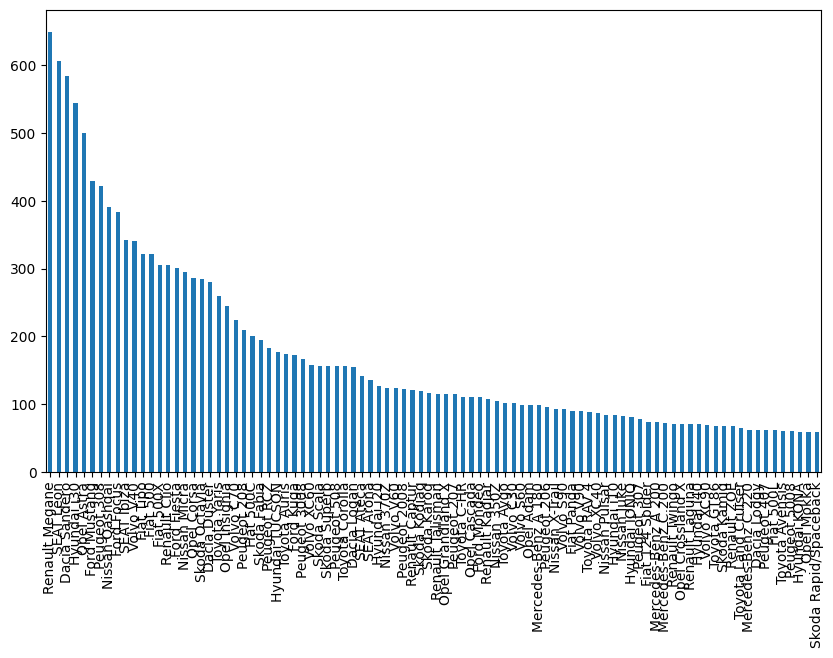

In [579]:
X_train.make_model.value_counts().plot.bar()

In [580]:
(X_train.make_model.value_counts()>70).sum()

76

## Dropping outliers that worsen my predictions from the dataset

### !!!! tum islemlerin bastan yapilmasi gerekiyor. Bu kisimdaki scriptler yukarida ilgili yere tasinarak tum islemleri tekrar baslatilmistir. Burada bu hesaplamalar yapildigi icin yorum altinda burada da birakilmistir.

In [581]:
#make_model_value_counts=ri2.make_model.value_counts()

In [582]:
#make_models_more70 = make_model_value_counts [make_model_value_counts>70].index

In [583]:
#make_models_more70

In [584]:
#ri3=ri2[ri2.make_model.isin(make_models_more70)].copy()

## Cross Validate

In [585]:
from sklearn.model_selection import cross_validate, cross_val_score


In [586]:
model = LinearRegression()
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'],
                        cv = 10,
                        return_train_score=True)

In [587]:
scores

{'fit_time': array([0.34759235, 0.30359864, 0.31512761, 0.29067588, 0.31864023,
        0.36953378, 0.30088949, 0.30347657, 0.29659319, 0.31482339]),
 'score_time': array([0.01575518, 0.        , 0.        , 0.01578188, 0.        ,
        0.0126884 , 0.01613927, 0.01566529, 0.01942134, 0.01586866]),
 'test_r2': array([0.86564606, 0.89089621, 0.84983345, 0.89735567, 0.88656078,
        0.87404948, 0.88596782, 0.89318427, 0.89559857, 0.8923379 ]),
 'train_r2': array([0.88824472, 0.88543545, 0.88956893, 0.88479924, 0.88573478,
        0.88714174, 0.8859129 , 0.88509126, 0.88479127, 0.88519919]),
 'test_neg_mean_absolute_error': array([-2737.57534653, -2596.10628648, -2634.65965317, -2544.69612691,
        -2707.94716126, -2591.17129879, -2571.66597999, -2618.21046363,
        -2601.70406086, -2616.13315977]),
 'train_neg_mean_absolute_error': array([-2583.77675216, -2595.16135263, -2592.22189311, -2606.9179153 ,
        -2590.13392843, -2600.14046517, -2603.51502911, -2592.44260344,
    

In [590]:
scores=pd.DataFrame(scores, index = range(1,11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.34759,0.01576,0.86565,0.88824,-2737.57535,-2583.77675,-18283918.25550,-14793631.68900,-4275.96986,-3846.24904,-0.20145,-0.18453
2,0.30360,0.00000,0.89090,0.88544,-2596.10629,-2595.16135,-15221271.87816,-15123422.23098,-3901.44484,-3888.88445,-0.18129,-0.18588
3,0.31513,0.00000,0.84983,0.88957,-2634.65965,-2592.22189,-18885786.36901,-14746458.84400,-4345.77799,-3840.11183,-0.19671,-0.18617
4,0.29068,0.01578,0.89736,0.88480,-2544.69613,-2606.91792,-12888908.27313,-15385931.76507,-3590.11257,-3922.49051,-0.18531,-0.18747
5,0.31864,0.00000,0.88656,0.88573,-2707.94716,-2590.13393,-15440095.16882,-15127093.64994,-3929.38865,-3889.35646,-0.19336,-0.18634
6,0.36953,0.01269,0.87405,0.88714,-2591.17130,-2600.14047,-15541871.49223,-15098199.90167,-3942.31804,-3885.64022,-0.20000,-0.18590
7,0.30089,0.01614,0.88597,0.88591,-2571.66598,-2603.51503,-14456515.19405,-15221986.58021,-3802.17243,-3901.53644,-0.17754,-0.18740
8,0.30348,0.01567,0.89318,0.88509,-2618.21046,-2592.44260,-14932673.01764,-15164020.24443,-3864.28169,-3894.10070,-0.19630,-0.18511
9,0.29659,0.01942,0.89560,0.88479,-2601.70406,-2599.67998,-14400124.61560,-15227026.01333,-3794.74961,-3902.18221,-0.17939,-0.18699
10,0.31482,0.01587,0.89234,0.88520,-2616.13316,-2595.47424,-14625099.29881,-15197973.40257,-3824.27762,-3898.45782,-0.17117,-0.18766


In [591]:
scores.iloc[:, 2:].mean()

test_r2                                            0.88314
train_r2                                           0.88619
test_neg_mean_absolute_error                   -2621.98695
train_neg_mean_absolute_error                  -2595.94642
test_neg_mean_squared_error                -15467626.35630
train_neg_mean_squared_error               -15108574.43212
test_neg_root_mean_squared_error               -3927.04933
train_neg_root_mean_squared_error              -3886.90097
test_neg_mean_absolute_percentage_error           -0.18825
train_neg_mean_absolute_percentage_error          -0.18634
dtype: float64

In [593]:
ls = train_val(y_train,y_train_pred, y_test,y_pred)   
ls

,train,test
R2,0.88608,0.87359
mae,2596.58861,2636.40591
mse,15123467.02105,16808832.50209
rmse,3888.89020,4099.85762
mape,0.18635,0.19263


In [ ]:
lm.coef_


In [ ]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

## Prediction Error

## Residual Plot

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

# Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [ ]:
#ri3

In [665]:
### ++User Defined Methods

In [666]:
pd.options.display.float_format = '{:.3f}'.format

In [667]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : root_mean_squared_error(y_train, y_train_pred),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : root_mean_squared_error(y_test, y_pred),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

In [668]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations
    p = X.shape[1] # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# If there are too many features in our data, but not enough rows, which makes a false improvement in our model's R2_score.
# Especially in such data or if too many new features (such as dummies feature) have been added to our data.
# We need to detect the real R2_score with adjusted R2_score.

# Adjusted R2_score Checks the trade off between the number of rows and the feature,
# and returns us a score. If there is a large imbalance between the numbers,
# there will be serious decreases in the adjusted_R2_score.

# We define the above function for Adjusted R2 Score.

### ++Split

In [788]:
X = ri3.drop(columns="price", axis=1)
y = ri3["price"]

In [789]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ++ Determine Ordinal Categories

In [790]:
categories_ordinal_cols={}

In [791]:
categories_ordinal_cols['comfort_and_convenience_package']=X_train['comfort_and_convenience_package'].unique().tolist()
categories_ordinal_cols

{'comfort_and_convenience_package': ['Premium', 'Standard', 'Premium Plus']}

In [792]:
X_train['entertainment_and_media_package'].unique()

array(['Standard', 'Plus'], dtype=object)

In [793]:
categories_ordinal_cols['entertainment_and_media_package']=X_train['entertainment_and_media_package'].unique().tolist()

In [794]:
X_train['safety_and_security_package'].unique()

array(['Safety Premium Package', 'Safety Standard Package',
       'Safety Premium Plus Package'], dtype=object)

In [795]:
#Custom reordering using indices in arrays
#order = [2, 0, 3, 1]
#reordered = arr[order]
categories_ordinal_cols['safety_and_security_package']=X_train['safety_and_security_package'].unique()[::-1].tolist()

In [796]:
categories_ordinal_cols

{'comfort_and_convenience_package': ['Premium', 'Standard', 'Premium Plus'],
 'entertainment_and_media_package': ['Standard', 'Plus'],
 'safety_and_security_package': ['Safety Premium Plus Package',
  'Safety Standard Package',
  'Safety Premium Package']}

In [797]:
list(categories_ordinal_cols.keys())

['comfort_and_convenience_package',
 'entertainment_and_media_package',
 'safety_and_security_package']

In [798]:
list(categories_ordinal_cols.values())

[['Premium', 'Standard', 'Premium Plus'],
 ['Standard', 'Plus'],
 ['Safety Premium Plus Package',
  'Safety Standard Package',
  'Safety Premium Package']]

### ++Determine non Ordinal Categories

In [799]:
cols_categorical= (X_train.select_dtypes(exclude=['number']).columns).tolist()
cols_categorical

['make_model',
 'body_type',
 'type',
 'warranty',
 'gearbox',
 'fuel_type',
 'seller',
 'drivetrain',
 'full_service_history',
 'upholstery',
 'energy_efficiency_class',
 'comfort_and_convenience_package',
 'entertainment_and_media_package',
 'safety_and_security_package']

In [800]:
cols_categorical= [x for x in categorical_cols if x not in list(categories_ordinal_cols.keys())]    
#=list(set(categorical_cols)-set(list(categories.keys())))
cols_categorical

['make_model',
 'body_type',
 'type',
 'warranty',
 'gearbox',
 'fuel_type',
 'seller',
 'drivetrain',
 'full_service_history',
 'upholstery',
 'energy_efficiency_class']

### ++Determine Binary Categories

In [801]:
cols_binary = [col for col in cols_categorical if X_train[col].nunique() == 2 ]
cols_binary

['warranty',
 'seller',
 'full_service_history',
 'upholstery',
 'energy_efficiency_class']

In [810]:
cols_categorical= [x for x in categorical_cols if x not in cols_binary]    
cols_categorical

['make_model', 'body_type', 'type', 'gearbox', 'fuel_type', 'drivetrain']

### ++ColumnTransformer

In [811]:
encoder_onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder_ordinal= OrdinalEncoder(categories=list(categories_ordinal_cols.values()), handle_unknown='use_encoded_value', unknown_value=-1)
encoder_binary = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [812]:
encoder = ColumnTransformer(
    transformers=[
        (  'ordinal'     ,encoder_ordinal , list(categories.keys())   ),
        (  'binary_catg' ,encoder_binary  , cols_binary               ),
        (  'onehot'      ,encoder_onehot  , cols_categorical          )  ],
    remainder='passthrough' 
)

### ++Pipeline Steps and Fit Model

In [813]:
scaler= MinMaxScaler()
model = LinearRegression()

In [814]:
operations=[ ('encoder', encoder)
            ,('scaler' , scaler)
            ,('model'  , model)  ]

In [815]:
lineer_model = Pipeline(steps=operations).set_output(transform="pandas")

In [816]:
lineer_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Premium',
                                                                              'Standard',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['comfort_and_convenience_...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'gearbox',
                                                   'fuel_type',
                                                   'drivetrain'])])),
                ('scaler', MinMaxScaler()), ('model', LinearRegression())])

### ++Model Scores

In [817]:
train_val(lineer_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.886,0.874
mae,2594.530,2635.160
mse,15120636.739,16802155.563
rmse,3888.526,4099.043
mape,0.186,0.192


In [818]:
y_pred = lineer_model.predict(X_test)

In [819]:
adj_r2(y_test, y_pred, X_test)

0.8728775160154834

In [820]:
candidate_model=lineer_model

### ++Cross Validate
As we learned in our previous lessons, we perform the overfiting control by comparing the train and validation scores we receive through cross validaition.   
##### return_indices=True, returns the index numbers of the train and validation data in each iteration

In [821]:
scores = cross_validate( candidate_model,    X_train, y_train,    cv =10,   return_train_score=True      # ,return_indices=True
        ,scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_percentage_error'])

In [822]:
#pd.DataFrame(scores)

In [823]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# We see that the scores between the train and validaiton set and the train set are close to each other.
# There is no overfitting.

test_r2                                            0.883
train_r2                                           0.886
test_neg_mean_absolute_error                   -2619.987
train_neg_mean_absolute_error                  -2595.276
test_neg_mean_squared_error                -15462514.816
train_neg_mean_squared_error               -15105962.817
test_neg_root_mean_squared_error               -3926.395
train_neg_root_mean_squared_error              -3886.564
test_neg_mean_absolute_percentage_error           -0.188
train_neg_mean_absolute_percentage_error          -0.186
dtype: float64

## +*+* TRY MODEL

In [824]:
def try_model(model_to_try,scaler,encoder, X_train, y_train, X_test, y_test):
    operations=[ ('encoder', encoder) ,('scaler' , scaler) ,('model'  , model_to_try) ]
    candidate_model = Pipeline(steps=operations).set_output(transform="pandas")
    candidate_model.fit(X_train, y_train)
   
    print(f'{model_to_try} Model Scores:  \n',train_val(candidate_model, X_train, y_train, X_test, y_test))
    
    y_pred = candidate_model.predict(X_test)
    print(f'\n{model_to_try} Model Adjasted R2 Score: ', adj_r2(y_test, y_pred, X_test))
    
    scores = cross_validate( candidate_model,    X_train, y_train,    cv =10,   return_train_score=True      # ,return_indices=True
        ,scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_percentage_error'])
    print(f'\n{model_to_try} Model Cross Valdate Scores:   \n',pd.DataFrame(scores).iloc[:, 2:].mean())
    return candidate_model,y_pred

## +*+* TRY MODEL-Lineer Regr.

In [825]:
model = LinearRegression()

In [826]:
model_lineer,y_pred_lineer=try_model(model,scaler,encoder, X_train, y_train, X_test, y_test)

LinearRegression() Model Scores:  
             train         test
R2          0.886        0.874
mae      2594.530     2635.160
mse  15120636.739 16802155.563
rmse     3888.526     4099.043
mape        0.186        0.192

LinearRegression() Model Adjasted R2 Score:  0.8728775160154834

LinearRegression() Model Cross Valdate Scores:   
 test_r2                                            0.883
train_r2                                           0.886
test_neg_mean_absolute_error                   -2619.987
train_neg_mean_absolute_error                  -2595.276
test_neg_mean_squared_error                -15462514.816
train_neg_mean_squared_error               -15105962.817
test_neg_root_mean_squared_error               -3926.395
train_neg_root_mean_squared_error              -3886.564
test_neg_mean_absolute_percentage_error           -0.188
train_neg_mean_absolute_percentage_error          -0.186
dtype: float64


## +*+* TRY MODEL in GridSearchCV

In [827]:
def try_model_in_GridSearchCV (param_grid, model_to_try,scaler,encoder, X_train, y_train, X_test, y_test):
    operations=[ ('encoder', encoder) ,('scaler' , scaler) ,('model'  , model_to_try) ]
    candidate_model = Pipeline(steps=operations)
    
    candidate_grid_model = GridSearchCV ( estimator=candidate_model,
                                  param_grid=param_grid,
                                  scoring='neg_root_mean_squared_error',
                                  cv=10,
                                  n_jobs=-1,
                                  return_train_score=True)

    candidate_grid_model.fit(X_train, y_train)
    
    print(f'{model_to_try} Grid Search Model Scores:  \n', train_val (candidate_grid_model, X_train, y_train, X_test, y_test)  )
    print(candidate_grid_model.best_estimator_)
    #y_pred = ridge_grid_model.predict(X_test)
    #print(f'\n{model_to_try} Model Adjasted R2 Score: ', adj_r2(y_test, y_pred, X_test))
    
    #scores = cross_validate( candidate_model,    X_train, y_train,    cv =10,   return_train_score=True      # ,return_indices=True
    #    ,scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_percentage_error'])
    #print(f'\n{model_to_try} Model Cross Valdate Scores:   \n',pd.DataFrame(scores).iloc[:, 2:].mean())
    return candidate_grid_model #,y_pred

## +*+* TRY MODEL in GridSearchCV - Ridge

In [828]:
alpha_space = np.linspace(0.001, 100, 100)
param_grid = {'model__alpha': alpha_space}
model_to_try = Ridge()

In [829]:
ridge_grid_model = try_model_in_GridSearchCV (param_grid, model_to_try,scaler,encoder, X_train, y_train, X_test, y_test)

Ridge() Grid Search Model Scores:  
             train         test
R2          0.886        0.874
mae      2595.084     2635.673
mse  15115434.666 16802394.763
rmse     3887.857     4099.072
mape        0.186        0.192
Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Premium',
                                                                              'Standard',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
        

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

### Model and Cross Validation

In [830]:
model = Ridge()

In [831]:
model_ridge,y_pred_ridge=try_model(model,scaler,encoder, X_train, y_train, X_test, y_test)

Ridge() Model Scores:  
             train         test
R2          0.886        0.874
mae      2593.981     2634.904
mse  15121289.024 16805810.295
rmse     3888.610     4099.489
mape        0.186        0.192

Ridge() Model Adjasted R2 Score:  0.8728498648800878

Ridge() Model Cross Valdate Scores:   
 test_r2                                            0.883
train_r2                                           0.886
test_neg_mean_absolute_error                   -2617.870
train_neg_mean_absolute_error                  -2593.379
test_neg_mean_squared_error                -15456545.724
train_neg_mean_squared_error               -15104801.063
test_neg_root_mean_squared_error               -3925.673
train_neg_root_mean_squared_error              -3886.415
test_neg_mean_absolute_percentage_error           -0.187
train_neg_mean_absolute_percentage_error          -0.186
dtype: float64


### Finding best alpha for Ridge

In [719]:
alpha_space = np.linspace(0.001, 100, 100)

##### *Parameter names should be used together with the model name defined in the pipeline.

In [725]:
param_grid = {'model__alpha': alpha_space} 

model_to_try = Ridge()
operations=[ ('encoder', encoder) ,('scaler' , scaler) ,('model'  , model_to_try) ]
candidate_model = Pipeline(steps=operations)

In [726]:
candidate_model

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Premium',
                                                                              'Standard',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['comfort_and_convenience_package',
                                                   'entertainment_and_media_package',
                                                   'safety_and_security_package']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'warranty',
                                                   'gearbox', 'fuel_type',
                                                   'seller', 'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class'])])),
                ('scaler', MinMaxScaler()), ('model', Ridge())])

In [727]:
ridge_grid_model = GridSearchCV ( estimator=candidate_model,
                                  param_grid=param_grid,
                                  scoring='neg_root_mean_squared_error',
                                  cv=10,
                                  n_jobs=-1,
                                  return_train_score=True)

In [728]:
ridge_grid_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(categories=[['Premium',
                                                                                                     'Standard',
                                                                                                     'Premium '
                                                                                                     'Plus'],
                                                                                                    ['Standard',
                                                                                                     'Plus'],
                                                                                                    ['Safety '
                                                                                                     'Premium '
                                                                                                     'Plus '
                                                                                                     'Package',
                                                                                                     'Safety '
                                                                                                     'Standard '
                                                                                                     'Package',
                                                                                                     'Safety '
                                                                                                     'Premium '
                                                                                                     'Package']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-...
        72.72754545,  73.73763636,  74.74772727,  75.75781818,
        76.76790909,  77.778     ,  78.78809091,  79.79818182,
        80.80827273,  81.81836364,  82.82845455,  83.83854545,
        84.84863636,  85.85872727,  86.86881818,  87.87890909,
        88.889     ,  89.89909091,  90.90918182,  91.91927273,
        92.92936364,  93.93945455,  94.94954545,  95.95963636,
        96.96972727,  97.97981818,  98.98990909, 100.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [729]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(categories=[['Premium',
                                                                                                     'Standard',
                                                                                                     'Premium '
                                                                                                     'Plus'],
                                                                                                    ['Standard',
                                                                                                     'Plus'],
                                                                                                    ['Safety '
                                                                                                     'Premium '
                                                                                                     'Plus '
                                                                                                     'Package',
                                                                                                     'Safety '
                                                                                                     'Standard '
                                                                                                     'Package',
                                                                                                     'Safety '
                                                                                                     'Premium '
                                                                                                     'Package']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-...
        72.72754545,  73.73763636,  74.74772727,  75.75781818,
        76.76790909,  77.778     ,  78.78809091,  79.79818182,
        80.80827273,  81.81836364,  82.82845455,  83.83854545,
        84.84863636,  85.85872727,  86.86881818,  87.87890909,
        88.889     ,  89.89909091,  90.90918182,  91.91927273,
        92.92936364,  93.93945455,  94.94954545,  95.95963636,
        96.96972727,  97.97981818,  98.98990909, 100.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [732]:
print(ridge_grid_model.best_estimator_)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Premium',
                                                                              'Standard',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                        

##### *Hyper returns only values other than default from parameters. If our best alpha after gridsearch was 1, it wouldn't show 1 here.

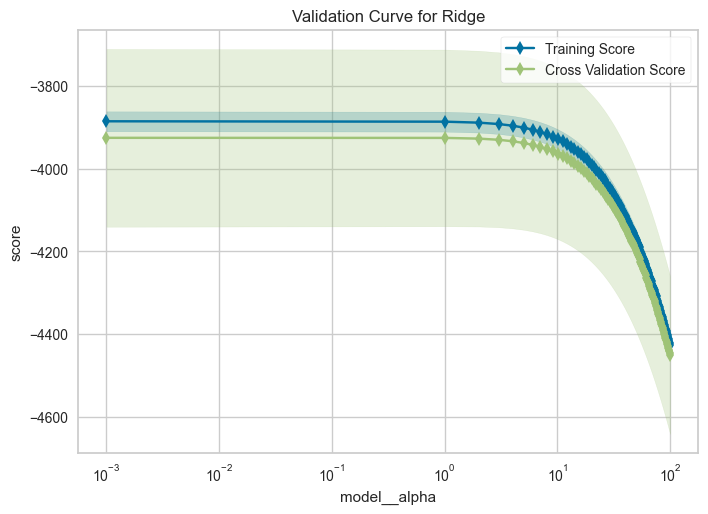

<Axes: title={'center': 'Validation Curve for Ridge'}, xlabel='model__alpha', ylabel='score'>

In [733]:
viz = ValidationCurve(
    candidate_model, param_name="model__alpha", param_range=np.linspace(0.001, 100, 100),
    logx=True, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

In [734]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3925.500
mean_train_score   -3885.497
Name: 0, dtype: object

In [735]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.886,0.874
mae,2595.084,2635.673
mse,15115434.666,16802394.747
rmse,3887.857,4099.072
mape,0.186,0.192


## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [711]:
model = Lasso()

In [712]:
model_lasso , y_pred_lasso = try_model(model,scaler,encoder, X_train, y_train, X_test, y_test)

Lasso() Model Scores:  
             train         test
R2          0.886        0.874
mae      2600.176     2638.890
mse  15154109.045 16807338.757
rmse     3892.828     4099.675
mape        0.186        0.192

Lasso() Model Adjasted R2 Score:  0.87283830077748

Lasso() Model Cross Valdate Scores:   
 test_r2                                            0.883
train_r2                                           0.886
test_neg_mean_absolute_error                   -2623.474
train_neg_mean_absolute_error                  -2599.478
test_neg_mean_squared_error                -15484340.677
train_neg_mean_squared_error               -15136708.380
test_neg_root_mean_squared_error               -3929.287
train_neg_root_mean_squared_error              -3890.519
test_neg_mean_absolute_percentage_error           -0.188
train_neg_mean_absolute_percentage_error          -0.186
dtype: float64


## Cross Validation

## Finding best alpha for Lasso

In [739]:
alpha_space = np.linspace(0.001, 100, 100)
param_grid = {'model__alpha': alpha_space}
model_to_try = Lasso()

In [740]:
lasso_grid_model = try_model_in_GridSearchCV (param_grid, model_to_try,scaler,encoder, X_train, y_train, X_test, y_test)

C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.904e+10, tolerance: 2.119e+08
  model = cd_fast.enet_coordinate_descent(


Lasso() Model Scores:  
             train         test
R2          0.886        0.874
mae      2595.085     2635.673
mse  15115434.697 16802372.736
rmse     3887.857     4099.070
mape        0.186        0.192
Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Premium',
                                                                              'Standard',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                    

## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [832]:
model = ElasticNet()

In [833]:
model_elasticnet,y_pred_elasticnet=try_model(model,scaler,encoder, X_train, y_train, X_test, y_test)

ElasticNet() Model Scores:  
             train         test
R2          0.474        0.462
mae      5978.294     6032.806
mse  69781706.669 71558108.567
rmse     8353.545     8459.203
mape        0.519        0.521

ElasticNet() Model Adjasted R2 Score:  0.4586025301235648

ElasticNet() Model Cross Valdate Scores:   
 test_r2                                            0.474
train_r2                                           0.475
test_neg_mean_absolute_error                   -5979.521
train_neg_mean_absolute_error                  -5976.038
test_neg_mean_squared_error                -69828662.765
train_neg_mean_squared_error               -69733962.516
test_neg_root_mean_squared_error               -8352.356
train_neg_root_mean_squared_error              -8350.665
test_neg_mean_absolute_percentage_error           -0.519
train_neg_mean_absolute_percentage_error          -0.519
dtype: float64


## Cross Validation

## Finding best alpha and l1_ratio for ElasticNet

In [834]:
param_grid = {'model__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'model__l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [835]:
model_to_try = ElasticNet()

In [836]:
elasticnet_grid_model = try_model_in_GridSearchCV (param_grid, model_to_try,scaler,encoder, X_train, y_train, X_test, y_test)

C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+11, tolerance: 2.119e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet() Grid Search Model Scores:  
             train         test
R2          0.886        0.874
mae      2594.817     2635.462
mse  15115605.127 16802051.677
rmse     3887.879     4099.031
mape        0.186        0.192
Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Premium',
                                                                              'Standard',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
   

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

In [840]:
# Access the best pipeline from GridSearchCV
best_pipeline = elasticnet_grid_model.best_estimator_

# Then access the ElasticNet model inside the pipeline
elastic_model = best_pipeline.named_steps['model']
encoder = best_pipeline.named_steps['encoder']

# If X_train is a DataFrame
feature_names = encoder.get_feature_names_out()

In [842]:
coefs = pd.Series(elastic_model.coef_, index=feature_names)
#  Exclude columns starting with 'onehot__make_model_'
filtered_coefs = coefs[~coefs.index.str.startswith('onehot__make_model_')]
important_features = filtered_coefs[filtered_coefs != 0].sort_values(key=abs, ascending=False)

print(" Important Features (non-zero coefficients):")
print(important_features)

 Important Features (non-zero coefficients):
remainder__power_kw                         33026.763
remainder__mileage                         -26459.010
remainder__age                             -15675.899
remainder__engine_size                       7492.998
onehot__type_Demonstration                   4223.871
onehot__fuel_type_Electric                   4179.649
remainder__empty_weight                      3352.053
remainder__cons_avg                         -2975.434
onehot__type_Employee's car                  2648.954
remainder__co_emissions                     -1983.436
onehot__gearbox_Automatic                    1872.897
onehot__type_Pre-registered                  1609.331
onehot__gearbox_Semi-automatic               1552.982
onehot__body_type_Off-Road/Pick-up          -1352.892
ordinal__entertainment_and_media_package     1148.897
onehot__type_Used                            -973.287
onehot__drivetrain_Rear                       946.551
onehot__body_type_Coupe              

In [843]:
# Filter: abs(coef) > 1000
strong_coefs = important_features[important_features.abs() > 1000]

# Extract name after "__"
extracted_names = strong_coefs.index.str.split('__').str[-1]

In [844]:
extracted_names

Index(['power_kw', 'mileage', 'age', 'engine_size', 'type_Demonstration',
       'fuel_type_Electric', 'empty_weight', 'cons_avg', 'type_Employee's car',
       'co_emissions', 'gearbox_Automatic', 'type_Pre-registered',
       'gearbox_Semi-automatic', 'body_type_Off-Road/Pick-up',
       'entertainment_and_media_package'],
      dtype='object')

In [853]:
original_columns_matched = []
for feat in extracted_names:
    found = next((col for col in X_train.columns if feat.startswith(col)), None)
    original_columns_matched.append(found)

In [923]:
columns_big_coef_1000=list(dict.fromkeys(original_columns_matched))
columns_big_coef_1000.append('make_model')
columns_big_coef_1000

['power_kw',
 'mileage',
 'age',
 'engine_size',
 'type',
 'fuel_type',
 'empty_weight',
 'cons_avg',
 'co_emissions',
 'gearbox',
 'body_type',
 'entertainment_and_media_package',
 'make_model']

In [924]:
X_train[columns_big_coef_1000]

,power_kw,mileage,age,engine_size,type,fuel_type,empty_weight,cons_avg,co_emissions,gearbox,body_type,entertainment_and_media_package,make_model
17613,96.000,103541.000,6.000,1600.000,Used,Diesel,1275.000,4.900,131.500,Automatic,Compact,Standard,Nissan Qashqai
8785,96.000,100.000,1.000,1199.000,Used,Benzine,1233.000,4.500,99.000,Automatic,Sedan,Standard,Peugeot 208
15074,55.000,74850.000,13.000,1390.000,Used,Benzine,1240.000,5.200,120.000,Manual,Station wagon,Standard,Dacia Logan
8742,98.000,7600.000,1.000,1499.000,Used,Diesel,1280.000,3.700,114.000,Automatic,Sedan,Standard,Peugeot 308
11434,81.000,131620.000,7.000,1197.000,Used,Benzine,1114.000,4.900,114.000,Manual,Coupe,Standard,SEAT Leon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14620,110.000,12751.000,0.000,1332.000,Used,Benzine,1320.000,6.150,139.000,Manual,Off-Road/Pick-up,Plus,Dacia Duster
15460,66.000,11000.000,1.000,999.000,Used,Benzine,1171.000,6.300,101.000,Manual,Sedan,Plus,Dacia Sandero
8031,96.000,62930.000,3.000,1199.000,Used,Benzine,1492.000,5.300,118.000,Manual,Off-Road/Pick-up,Plus,Peugeot 3008
2820,103.000,189950.000,15.000,1796.000,Used,Benzine,1500.000,7.700,185.000,Manual,Convertible,Standard,Opel Astra


In [925]:
def select_features_coef(coef_limit,important_features):
    strong_coefs = important_features[important_features.abs() > coef_limit]
    extracted_names = strong_coefs.index.str.split('__').str[-1]
    
    original_columns_matched = []
    for feat in extracted_names:
        found = next((col for col in X_train.columns if feat.startswith(col)), None)
        original_columns_matched.append(found)
        
    columns_big_coef_limit=list(dict.fromkeys(original_columns_matched))
    
    return columns_big_coef_limit

In [926]:
columns_big_coef_4000 = select_features_coef ( 4000 , important_features )
columns_big_coef_4000.append('make_model')
columns_big_coef_4000

['power_kw',
 'mileage',
 'age',
 'engine_size',
 'type',
 'fuel_type',
 'make_model']

#  **Create New Model

In [940]:
X_train_1 = X_train[columns_big_coef_1000].copy()
X_test_1 = X_test[columns_big_coef_1000].copy()

In [941]:
cols_categorical= (X_train_1.select_dtypes(exclude=['number']).columns).tolist()
cols_categorical

['type',
 'fuel_type',
 'gearbox',
 'body_type',
 'entertainment_and_media_package',
 'make_model']

### ++Determine Binary Categories

In [942]:
cols_binary = [col for col in cols_categorical if X_train_1[col].nunique() == 2 ]
cols_binary

['entertainment_and_media_package']

### ++ColumnTransformer

In [943]:
encoder_onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [944]:
encoder = ColumnTransformer(
    transformers=[
                (  'onehot'      ,encoder_onehot  , cols_categorical          )  ],
    remainder='passthrough' 
)

### ++Pipeline Steps and Fit Model

#### ElasticNet Grid Search

In [945]:
scaler= MinMaxScaler()
model = LinearRegression()

In [946]:
operations=[ ('encoder', encoder)
            ,('scaler' , scaler)
            ,('model'  , model)  ]

In [947]:
param_grid = {'model__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'model__l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [948]:
model_to_try = ElasticNet()



In [917]:
elasticnet_grid_model_12cols = try_model_in_GridSearchCV (param_grid, model_to_try,scaler,encoder,X_train_1, y_train,X_test_1 , y_test)

ElasticNet() Grid Search Model Scores:  
             train         test
R2          0.790        0.779
mae      3658.447     3706.293
mse  27945797.159 29412138.292
rmse     5286.378     5423.296
mape        0.246        0.249
Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['type', 'fuel_type'])])),
                ('scaler', MinMaxScaler()),
                ('model', ElasticNet(alpha=0.001, l1_ratio=1))])


## Cross Validate

#### Ridge Cross Validate

In [949]:
model = Ridge(alpha=0.001)

In [950]:
model_lasso_12cols , y_pred_lasso_12cols = try_model(model,scaler,encoder, X_train_1, y_train, X_test_1, y_test)

Ridge(alpha=0.001) Model Scores:  
             train         test
R2          0.885        0.871
mae      2607.223     2669.695
mse  15282915.941 17191099.907
rmse     3909.337     4146.215
mape        0.187        0.194

Ridge(alpha=0.001) Model Adjasted R2 Score:  0.8702944812222284

Ridge(alpha=0.001) Model Cross Valdate Scores:   
 test_r2                                            0.882
train_r2                                           0.885
test_neg_mean_absolute_error                   -2629.294
train_neg_mean_absolute_error                  -2606.527
test_neg_mean_squared_error                -15587265.310
train_neg_mean_squared_error               -15267001.597
test_neg_root_mean_squared_error               -3941.736
train_neg_root_mean_squared_error              -3907.221
test_neg_mean_absolute_percentage_error           -0.188
train_neg_mean_absolute_percentage_error          -0.187
dtype: float64


#### Linear Cross Validate

In [951]:
model = LinearRegression()

In [952]:
model_12cols , y_pred_12cols = try_model(model,scaler,encoder, X_train_1, y_train, X_test_1, y_test)

LinearRegression() Model Scores:  
             train         test
R2          0.885        0.871
mae      2609.942     2672.482
mse  15285983.751 17194584.285
rmse     3909.729     4146.635
mape        0.187        0.195

LinearRegression() Model Adjasted R2 Score:  0.8702681918623387

LinearRegression() Model Cross Valdate Scores:   
 test_r2                                            0.882
train_r2                                           0.885
test_neg_mean_absolute_error                   -2632.960
train_neg_mean_absolute_error                  -2609.618
test_neg_mean_squared_error                -15610915.590
train_neg_mean_squared_error               -15283895.734
test_neg_root_mean_squared_error               -3944.826
train_neg_root_mean_squared_error              -3909.377
test_neg_mean_absolute_percentage_error           -0.189
train_neg_mean_absolute_percentage_error          -0.187
dtype: float64


***********RESULT: 
 columns_big_coef_4000 (6 column)
             train         test
R2          0.876        0.863  
mae      2743.356     2797.891
mse  16472097.177 18211603.153
rmse     4058.583     4267.505
mape        0.196        0.203

 ve columns_big_coef_1000 (12 column)
              train         test
R2          0.885        0.871
mae      2609.942     2672.482
mse  15285983.751 17194584.285
rmse     3909.729     4146.635
mape        0.187        0.195

### 12 column ve Lineer regression secilmistir. Diger modellerle yapilan hesaplamalarda hic bir farka rastlanmamistir.

## 7. Visually Compare Models Performance In a Graph

## Prediction a new observation
- Create an observation and predict its price

In [954]:
operations = [("encoder" , OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
              ("scaler"  , MinMaxScaler()),
              ("Lasso"   , LinearRegression())]
final_model = Pipeline(steps=operations)

In [ ]:
final_model.fit(X[columns_big_coef_1000], y)